Import relevant libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from google.colab import files
import io


Read the json file webscraped from NBA TopShot with the data

In [ ]:
uploaded = files.upload()


Saving topshot_data_01172022.json to topshot_data_01172022.json


In [ ]:
data = pd.read_json(io.BytesIO(uploaded['topshot_data_01172022.json']))
data
# import io
# df2 = pd.read_csv(io.BytesIO(uploaded['Filename.csv']))

,link,title,description,challenge_reward,rarity,scarcity,badge_rookie_year,badge_top_shot_debut,badge_rookie_mint,badge_rookie_premiere,badge_rookie_three_stars,badge_championship_year,supply,price
0,https://www.nbatopshot.com/listings/p2p/208ae3...,DONOVAN MITCHELL,"Dunk - Jan 1 2021, Base Set (Series 2), UTA",0,Common,#/35000LE,0,0,0,0,0,0,,$6.00
1,https://www.nbatopshot.com/listings/p2p/e7b964...,CODY MARTIN,"Dunk - Oct 22 2021, Base Set (Series 3), CHA",0,Common,#/60000+CC,0,0,0,0,0,0,,$8.00
2,https://www.nbatopshot.com/listings/p2p/9e89b5...,BEN GORDON,"Jump Shot - Jan 18 2006, Archive Set (Summer 2...",0,Common,#/20000LE,0,1,0,0,0,0,,$4.00
3,https://www.nbatopshot.com/listings/p2p/78e6e1...,MILES BRIDGES,"Dunk - Oct 24 2021, Hustle and Show (Series 3)...",0,Common,#/18000LE,0,0,0,0,0,0,,$12.00
4,https://www.nbatopshot.com/listings/p2p/9e89b5...,KYLE KORVER,"3 Pointer - Jan 13 2006, Archive Set (Summer 2...",0,Common,#/20000LE,0,1,0,0,0,0,,$7.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1841,https://www.nbatopshot.com/listings/p2p/a156f0...,JAVALE MCGEE,"Block - Jan 15 2020, Denied! (Series 1), LAL",1,Rare,#/150LE,0,1,0,0,0,1,,"$2,749.00"
1842,https://www.nbatopshot.com/listings/p2p/a494c6...,LEBRON JAMES,"Dunk - Feb 6 2020, From the Top (Series 1), LAL",0,Legendary,#/59LE,0,0,0,0,0,1,Only 3 listings,"$219,000.00"
1843,https://www.nbatopshot.com/listings/p2p/c561f6...,LONNIE WALKER,"3 Pointer - Dec 3 2019, Cosmic (Series 1), SAS",0,Legendary,#/49LE,0,1,0,0,0,0,Only 3 listings,"$8,888.00"
1844,https://www.nbatopshot.com/listings/p2p/c561f6...,MARQUESE CHRISS,"Dunk - Feb 8 2020, Cosmic (Series 1), GSW",0,Legendary,#/49LE,0,1,0,0,0,0,Only 4 listings,"$7,500.00"


In [ ]:
data.loc[data['title'] == "BRUCE BROWN"]

,link,title,description,challenge_reward,rarity,scarcity,badge_rookie_year,badge_top_shot_debut,badge_rookie_mint,badge_rookie_premiere,badge_rookie_three_stars,badge_championship_year,supply,price
346,https://www.nbatopshot.com/listings/p2p/7b7976...,BRUCE BROWN,"Dunk - Feb 23 2020, Base Set (Series 1), DET",0,Common,#/3339LE,0,1,0,0,0,0,,$36.00
796,https://www.nbatopshot.com/listings/p2p/2dbc54...,BRUCE BROWN,"Dunk - Feb 23 2020, Throwdowns (Series 1), DET",0,Rare,#/275LE,0,1,0,0,0,0,,$339.00
1779,https://www.nbatopshot.com/listings/p2p/12a828...,BRUCE BROWN,"Dunk - Feb 23 2020, Metallic Gold LE (Series 1...",0,Rare,#/299LE,0,1,0,0,0,0,,$340.00


Start cleaning the data and separate the "description" column into different features. New columns created called "Play Type" and "info" (description - Play Type).

In [ ]:
data[['Play_Type','info']] = data['description'].str.split(" -",expand=True)
data

,link,title,description,challenge_reward,rarity,scarcity,badge_rookie_year,badge_top_shot_debut,badge_rookie_mint,badge_rookie_premiere,badge_rookie_three_stars,badge_championship_year,supply,price,Play_Type,info
0,https://www.nbatopshot.com/listings/p2p/208ae3...,DONOVAN MITCHELL,"Dunk - Jan 1 2021, Base Set (Series 2), UTA",0,Common,#/35000LE,0,0,0,0,0,0,,$6.00,Dunk,"Jan 1 2021, Base Set (Series 2), UTA"
1,https://www.nbatopshot.com/listings/p2p/e7b964...,CODY MARTIN,"Dunk - Oct 22 2021, Base Set (Series 3), CHA",0,Common,#/60000+CC,0,0,0,0,0,0,,$8.00,Dunk,"Oct 22 2021, Base Set (Series 3), CHA"
2,https://www.nbatopshot.com/listings/p2p/9e89b5...,BEN GORDON,"Jump Shot - Jan 18 2006, Archive Set (Summer 2...",0,Common,#/20000LE,0,1,0,0,0,0,,$4.00,Jump Shot,"Jan 18 2006, Archive Set (Summer 2021), CHI"
3,https://www.nbatopshot.com/listings/p2p/78e6e1...,MILES BRIDGES,"Dunk - Oct 24 2021, Hustle and Show (Series 3)...",0,Common,#/18000LE,0,0,0,0,0,0,,$12.00,Dunk,"Oct 24 2021, Hustle and Show (Series 3), CHA"
4,https://www.nbatopshot.com/listings/p2p/9e89b5...,KYLE KORVER,"3 Pointer - Jan 13 2006, Archive Set (Summer 2...",0,Common,#/20000LE,0,1,0,0,0,0,,$7.00,3 Pointer,"Jan 13 2006, Archive Set (Summer 2021), PHI"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1841,https://www.nbatopshot.com/listings/p2p/a156f0...,JAVALE MCGEE,"Block - Jan 15 2020, Denied! (Series 1), LAL",1,Rare,#/150LE,0,1,0,0,0,1,,"$2,749.00",Block,"Jan 15 2020, Denied! (Series 1), LAL"
1842,https://www.nbatopshot.com/listings/p2p/a494c6...,LEBRON JAMES,"Dunk - Feb 6 2020, From the Top (Series 1), LAL",0,Legendary,#/59LE,0,0,0,0,0,1,Only 3 listings,"$219,000.00",Dunk,"Feb 6 2020, From the Top (Series 1), LAL"
1843,https://www.nbatopshot.com/listings/p2p/c561f6...,LONNIE WALKER,"3 Pointer - Dec 3 2019, Cosmic (Series 1), SAS",0,Legendary,#/49LE,0,1,0,0,0,0,Only 3 listings,"$8,888.00",3 Pointer,"Dec 3 2019, Cosmic (Series 1), SAS"
1844,https://www.nbatopshot.com/listings/p2p/c561f6...,MARQUESE CHRISS,"Dunk - Feb 8 2020, Cosmic (Series 1), GSW",0,Legendary,#/49LE,0,1,0,0,0,0,Only 4 listings,"$7,500.00",Dunk,"Feb 8 2020, Cosmic (Series 1), GSW"


Continue separation of "description" column by separating "info" column into "Year_Set" (Date + Set) and "Series_Team" (Series + Team)

In [ ]:
data[['Year_Set','Series_Team']] = data['info'].str.split("(",expand=True)
data

,link,title,description,challenge_reward,rarity,scarcity,badge_rookie_year,badge_top_shot_debut,badge_rookie_mint,badge_rookie_premiere,badge_rookie_three_stars,badge_championship_year,supply,price,Play_Type,info,Year_Set,Series_Team
0,https://www.nbatopshot.com/listings/p2p/208ae3...,DONOVAN MITCHELL,"Dunk - Jan 1 2021, Base Set (Series 2), UTA",0,Common,#/35000LE,0,0,0,0,0,0,,$6.00,Dunk,"Jan 1 2021, Base Set (Series 2), UTA","Jan 1 2021, Base Set","Series 2), UTA"
1,https://www.nbatopshot.com/listings/p2p/e7b964...,CODY MARTIN,"Dunk - Oct 22 2021, Base Set (Series 3), CHA",0,Common,#/60000+CC,0,0,0,0,0,0,,$8.00,Dunk,"Oct 22 2021, Base Set (Series 3), CHA","Oct 22 2021, Base Set","Series 3), CHA"
2,https://www.nbatopshot.com/listings/p2p/9e89b5...,BEN GORDON,"Jump Shot - Jan 18 2006, Archive Set (Summer 2...",0,Common,#/20000LE,0,1,0,0,0,0,,$4.00,Jump Shot,"Jan 18 2006, Archive Set (Summer 2021), CHI","Jan 18 2006, Archive Set","Summer 2021), CHI"
3,https://www.nbatopshot.com/listings/p2p/78e6e1...,MILES BRIDGES,"Dunk - Oct 24 2021, Hustle and Show (Series 3)...",0,Common,#/18000LE,0,0,0,0,0,0,,$12.00,Dunk,"Oct 24 2021, Hustle and Show (Series 3), CHA","Oct 24 2021, Hustle and Show","Series 3), CHA"
4,https://www.nbatopshot.com/listings/p2p/9e89b5...,KYLE KORVER,"3 Pointer - Jan 13 2006, Archive Set (Summer 2...",0,Common,#/20000LE,0,1,0,0,0,0,,$7.00,3 Pointer,"Jan 13 2006, Archive Set (Summer 2021), PHI","Jan 13 2006, Archive Set","Summer 2021), PHI"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1841,https://www.nbatopshot.com/listings/p2p/a156f0...,JAVALE MCGEE,"Block - Jan 15 2020, Denied! (Series 1), LAL",1,Rare,#/150LE,0,1,0,0,0,1,,"$2,749.00",Block,"Jan 15 2020, Denied! (Series 1), LAL","Jan 15 2020, Denied!","Series 1), LAL"
1842,https://www.nbatopshot.com/listings/p2p/a494c6...,LEBRON JAMES,"Dunk - Feb 6 2020, From the Top (Series 1), LAL",0,Legendary,#/59LE,0,0,0,0,0,1,Only 3 listings,"$219,000.00",Dunk,"Feb 6 2020, From the Top (Series 1), LAL","Feb 6 2020, From the Top","Series 1), LAL"
1843,https://www.nbatopshot.com/listings/p2p/c561f6...,LONNIE WALKER,"3 Pointer - Dec 3 2019, Cosmic (Series 1), SAS",0,Legendary,#/49LE,0,1,0,0,0,0,Only 3 listings,"$8,888.00",3 Pointer,"Dec 3 2019, Cosmic (Series 1), SAS","Dec 3 2019, Cosmic","Series 1), SAS"
1844,https://www.nbatopshot.com/listings/p2p/c561f6...,MARQUESE CHRISS,"Dunk - Feb 8 2020, Cosmic (Series 1), GSW",0,Legendary,#/49LE,0,1,0,0,0,0,Only 4 listings,"$7,500.00",Dunk,"Feb 8 2020, Cosmic (Series 1), GSW","Feb 8 2020, Cosmic","Series 1), GSW"


Continue separation of "description" column by separating "Year_set" column into "Date" and "Set"

In [ ]:
data[['Date','Set']] = data['Year_Set'].str.split(",",expand=True)
data

,link,title,description,challenge_reward,rarity,scarcity,badge_rookie_year,badge_top_shot_debut,badge_rookie_mint,badge_rookie_premiere,badge_rookie_three_stars,badge_championship_year,supply,price,Play_Type,info,Year_Set,Series_Team,Date,Set
0,https://www.nbatopshot.com/listings/p2p/208ae3...,DONOVAN MITCHELL,"Dunk - Jan 1 2021, Base Set (Series 2), UTA",0,Common,#/35000LE,0,0,0,0,0,0,,$6.00,Dunk,"Jan 1 2021, Base Set (Series 2), UTA","Jan 1 2021, Base Set","Series 2), UTA",Jan 1 2021,Base Set
1,https://www.nbatopshot.com/listings/p2p/e7b964...,CODY MARTIN,"Dunk - Oct 22 2021, Base Set (Series 3), CHA",0,Common,#/60000+CC,0,0,0,0,0,0,,$8.00,Dunk,"Oct 22 2021, Base Set (Series 3), CHA","Oct 22 2021, Base Set","Series 3), CHA",Oct 22 2021,Base Set
2,https://www.nbatopshot.com/listings/p2p/9e89b5...,BEN GORDON,"Jump Shot - Jan 18 2006, Archive Set (Summer 2...",0,Common,#/20000LE,0,1,0,0,0,0,,$4.00,Jump Shot,"Jan 18 2006, Archive Set (Summer 2021), CHI","Jan 18 2006, Archive Set","Summer 2021), CHI",Jan 18 2006,Archive Set
3,https://www.nbatopshot.com/listings/p2p/78e6e1...,MILES BRIDGES,"Dunk - Oct 24 2021, Hustle and Show (Series 3)...",0,Common,#/18000LE,0,0,0,0,0,0,,$12.00,Dunk,"Oct 24 2021, Hustle and Show (Series 3), CHA","Oct 24 2021, Hustle and Show","Series 3), CHA",Oct 24 2021,Hustle and Show
4,https://www.nbatopshot.com/listings/p2p/9e89b5...,KYLE KORVER,"3 Pointer - Jan 13 2006, Archive Set (Summer 2...",0,Common,#/20000LE,0,1,0,0,0,0,,$7.00,3 Pointer,"Jan 13 2006, Archive Set (Summer 2021), PHI","Jan 13 2006, Archive Set","Summer 2021), PHI",Jan 13 2006,Archive Set
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1841,https://www.nbatopshot.com/listings/p2p/a156f0...,JAVALE MCGEE,"Block - Jan 15 2020, Denied! (Series 1), LAL",1,Rare,#/150LE,0,1,0,0,0,1,,"$2,749.00",Block,"Jan 15 2020, Denied! (Series 1), LAL","Jan 15 2020, Denied!","Series 1), LAL",Jan 15 2020,Denied!
1842,https://www.nbatopshot.com/listings/p2p/a494c6...,LEBRON JAMES,"Dunk - Feb 6 2020, From the Top (Series 1), LAL",0,Legendary,#/59LE,0,0,0,0,0,1,Only 3 listings,"$219,000.00",Dunk,"Feb 6 2020, From the Top (Series 1), LAL","Feb 6 2020, From the Top","Series 1), LAL",Feb 6 2020,From the Top
1843,https://www.nbatopshot.com/listings/p2p/c561f6...,LONNIE WALKER,"3 Pointer - Dec 3 2019, Cosmic (Series 1), SAS",0,Legendary,#/49LE,0,1,0,0,0,0,Only 3 listings,"$8,888.00",3 Pointer,"Dec 3 2019, Cosmic (Series 1), SAS","Dec 3 2019, Cosmic","Series 1), SAS",Dec 3 2019,Cosmic
1844,https://www.nbatopshot.com/listings/p2p/c561f6...,MARQUESE CHRISS,"Dunk - Feb 8 2020, Cosmic (Series 1), GSW",0,Legendary,#/49LE,0,1,0,0,0,0,Only 4 listings,"$7,500.00",Dunk,"Feb 8 2020, Cosmic (Series 1), GSW","Feb 8 2020, Cosmic","Series 1), GSW",Feb 8 2020,Cosmic


Continue separation of "description" column by separating "Series_Team" column into "Series" and "Team"

In [ ]:
data[['Series','Team']] = data['Series_Team'].str.split(",",expand=True)
data

,link,title,description,challenge_reward,rarity,scarcity,badge_rookie_year,badge_top_shot_debut,badge_rookie_mint,badge_rookie_premiere,...,supply,price,Play_Type,info,Year_Set,Series_Team,Date,Set,Series,Team
0,https://www.nbatopshot.com/listings/p2p/208ae3...,DONOVAN MITCHELL,"Dunk - Jan 1 2021, Base Set (Series 2), UTA",0,Common,#/35000LE,0,0,0,0,...,,$6.00,Dunk,"Jan 1 2021, Base Set (Series 2), UTA","Jan 1 2021, Base Set","Series 2), UTA",Jan 1 2021,Base Set,Series 2),UTA
1,https://www.nbatopshot.com/listings/p2p/e7b964...,CODY MARTIN,"Dunk - Oct 22 2021, Base Set (Series 3), CHA",0,Common,#/60000+CC,0,0,0,0,...,,$8.00,Dunk,"Oct 22 2021, Base Set (Series 3), CHA","Oct 22 2021, Base Set","Series 3), CHA",Oct 22 2021,Base Set,Series 3),CHA
2,https://www.nbatopshot.com/listings/p2p/9e89b5...,BEN GORDON,"Jump Shot - Jan 18 2006, Archive Set (Summer 2...",0,Common,#/20000LE,0,1,0,0,...,,$4.00,Jump Shot,"Jan 18 2006, Archive Set (Summer 2021), CHI","Jan 18 2006, Archive Set","Summer 2021), CHI",Jan 18 2006,Archive Set,Summer 2021),CHI
3,https://www.nbatopshot.com/listings/p2p/78e6e1...,MILES BRIDGES,"Dunk - Oct 24 2021, Hustle and Show (Series 3)...",0,Common,#/18000LE,0,0,0,0,...,,$12.00,Dunk,"Oct 24 2021, Hustle and Show (Series 3), CHA","Oct 24 2021, Hustle and Show","Series 3), CHA",Oct 24 2021,Hustle and Show,Series 3),CHA
4,https://www.nbatopshot.com/listings/p2p/9e89b5...,KYLE KORVER,"3 Pointer - Jan 13 2006, Archive Set (Summer 2...",0,Common,#/20000LE,0,1,0,0,...,,$7.00,3 Pointer,"Jan 13 2006, Archive Set (Summer 2021), PHI","Jan 13 2006, Archive Set","Summer 2021), PHI",Jan 13 2006,Archive Set,Summer 2021),PHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1841,https://www.nbatopshot.com/listings/p2p/a156f0...,JAVALE MCGEE,"Block - Jan 15 2020, Denied! (Series 1), LAL",1,Rare,#/150LE,0,1,0,0,...,,"$2,749.00",Block,"Jan 15 2020, Denied! (Series 1), LAL","Jan 15 2020, Denied!","Series 1), LAL",Jan 15 2020,Denied!,Series 1),LAL
1842,https://www.nbatopshot.com/listings/p2p/a494c6...,LEBRON JAMES,"Dunk - Feb 6 2020, From the Top (Series 1), LAL",0,Legendary,#/59LE,0,0,0,0,...,Only 3 listings,"$219,000.00",Dunk,"Feb 6 2020, From the Top (Series 1), LAL","Feb 6 2020, From the Top","Series 1), LAL",Feb 6 2020,From the Top,Series 1),LAL
1843,https://www.nbatopshot.com/listings/p2p/c561f6...,LONNIE WALKER,"3 Pointer - Dec 3 2019, Cosmic (Series 1), SAS",0,Legendary,#/49LE,0,1,0,0,...,Only 3 listings,"$8,888.00",3 Pointer,"Dec 3 2019, Cosmic (Series 1), SAS","Dec 3 2019, Cosmic","Series 1), SAS",Dec 3 2019,Cosmic,Series 1),SAS
1844,https://www.nbatopshot.com/listings/p2p/c561f6...,MARQUESE CHRISS,"Dunk - Feb 8 2020, Cosmic (Series 1), GSW",0,Legendary,#/49LE,0,1,0,0,...,Only 4 listings,"$7,500.00",Dunk,"Feb 8 2020, Cosmic (Series 1), GSW","Feb 8 2020, Cosmic","Series 1), GSW",Feb 8 2020,Cosmic,Series 1),GSW


Eliminate the character "(" from the "Series" column values.

In [ ]:
data['Series'] = data['Series'].str.replace(')','')
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


,link,title,description,challenge_reward,rarity,scarcity,badge_rookie_year,badge_top_shot_debut,badge_rookie_mint,badge_rookie_premiere,...,supply,price,Play_Type,info,Year_Set,Series_Team,Date,Set,Series,Team
0,https://www.nbatopshot.com/listings/p2p/208ae3...,DONOVAN MITCHELL,"Dunk - Jan 1 2021, Base Set (Series 2), UTA",0,Common,#/35000LE,0,0,0,0,...,,$6.00,Dunk,"Jan 1 2021, Base Set (Series 2), UTA","Jan 1 2021, Base Set","Series 2), UTA",Jan 1 2021,Base Set,Series 2,UTA
1,https://www.nbatopshot.com/listings/p2p/e7b964...,CODY MARTIN,"Dunk - Oct 22 2021, Base Set (Series 3), CHA",0,Common,#/60000+CC,0,0,0,0,...,,$8.00,Dunk,"Oct 22 2021, Base Set (Series 3), CHA","Oct 22 2021, Base Set","Series 3), CHA",Oct 22 2021,Base Set,Series 3,CHA
2,https://www.nbatopshot.com/listings/p2p/9e89b5...,BEN GORDON,"Jump Shot - Jan 18 2006, Archive Set (Summer 2...",0,Common,#/20000LE,0,1,0,0,...,,$4.00,Jump Shot,"Jan 18 2006, Archive Set (Summer 2021), CHI","Jan 18 2006, Archive Set","Summer 2021), CHI",Jan 18 2006,Archive Set,Summer 2021,CHI
3,https://www.nbatopshot.com/listings/p2p/78e6e1...,MILES BRIDGES,"Dunk - Oct 24 2021, Hustle and Show (Series 3)...",0,Common,#/18000LE,0,0,0,0,...,,$12.00,Dunk,"Oct 24 2021, Hustle and Show (Series 3), CHA","Oct 24 2021, Hustle and Show","Series 3), CHA",Oct 24 2021,Hustle and Show,Series 3,CHA
4,https://www.nbatopshot.com/listings/p2p/9e89b5...,KYLE KORVER,"3 Pointer - Jan 13 2006, Archive Set (Summer 2...",0,Common,#/20000LE,0,1,0,0,...,,$7.00,3 Pointer,"Jan 13 2006, Archive Set (Summer 2021), PHI","Jan 13 2006, Archive Set","Summer 2021), PHI",Jan 13 2006,Archive Set,Summer 2021,PHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1841,https://www.nbatopshot.com/listings/p2p/a156f0...,JAVALE MCGEE,"Block - Jan 15 2020, Denied! (Series 1), LAL",1,Rare,#/150LE,0,1,0,0,...,,"$2,749.00",Block,"Jan 15 2020, Denied! (Series 1), LAL","Jan 15 2020, Denied!","Series 1), LAL",Jan 15 2020,Denied!,Series 1,LAL
1842,https://www.nbatopshot.com/listings/p2p/a494c6...,LEBRON JAMES,"Dunk - Feb 6 2020, From the Top (Series 1), LAL",0,Legendary,#/59LE,0,0,0,0,...,Only 3 listings,"$219,000.00",Dunk,"Feb 6 2020, From the Top (Series 1), LAL","Feb 6 2020, From the Top","Series 1), LAL",Feb 6 2020,From the Top,Series 1,LAL
1843,https://www.nbatopshot.com/listings/p2p/c561f6...,LONNIE WALKER,"3 Pointer - Dec 3 2019, Cosmic (Series 1), SAS",0,Legendary,#/49LE,0,1,0,0,...,Only 3 listings,"$8,888.00",3 Pointer,"Dec 3 2019, Cosmic (Series 1), SAS","Dec 3 2019, Cosmic","Series 1), SAS",Dec 3 2019,Cosmic,Series 1,SAS
1844,https://www.nbatopshot.com/listings/p2p/c561f6...,MARQUESE CHRISS,"Dunk - Feb 8 2020, Cosmic (Series 1), GSW",0,Legendary,#/49LE,0,1,0,0,...,Only 4 listings,"$7,500.00",Dunk,"Feb 8 2020, Cosmic (Series 1), GSW","Feb 8 2020, Cosmic","Series 1), GSW",Feb 8 2020,Cosmic,Series 1,GSW


Drop the temporary columns created "info", "Series_Team", "Year_Set" and "description", used to separate the data in the column "info" into different features.

In [ ]:
data.drop('info', axis=1, inplace=True)
data.drop('Series_Team', axis=1, inplace=True)
data.drop('Year_Set', axis=1, inplace=True)
data.drop('description', axis=1, inplace=True)
data.drop('link', axis=1, inplace=True)
data.drop('Date', axis=1, inplace=True)
data

,title,challenge_reward,rarity,scarcity,badge_rookie_year,badge_top_shot_debut,badge_rookie_mint,badge_rookie_premiere,badge_rookie_three_stars,badge_championship_year,supply,price,Play_Type,Set,Series,Team
0,DONOVAN MITCHELL,0,Common,#/35000LE,0,0,0,0,0,0,,$6.00,Dunk,Base Set,Series 2,UTA
1,CODY MARTIN,0,Common,#/60000+CC,0,0,0,0,0,0,,$8.00,Dunk,Base Set,Series 3,CHA
2,BEN GORDON,0,Common,#/20000LE,0,1,0,0,0,0,,$4.00,Jump Shot,Archive Set,Summer 2021,CHI
3,MILES BRIDGES,0,Common,#/18000LE,0,0,0,0,0,0,,$12.00,Dunk,Hustle and Show,Series 3,CHA
4,KYLE KORVER,0,Common,#/20000LE,0,1,0,0,0,0,,$7.00,3 Pointer,Archive Set,Summer 2021,PHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1841,JAVALE MCGEE,1,Rare,#/150LE,0,1,0,0,0,1,,"$2,749.00",Block,Denied!,Series 1,LAL
1842,LEBRON JAMES,0,Legendary,#/59LE,0,0,0,0,0,1,Only 3 listings,"$219,000.00",Dunk,From the Top,Series 1,LAL
1843,LONNIE WALKER,0,Legendary,#/49LE,0,1,0,0,0,0,Only 3 listings,"$8,888.00",3 Pointer,Cosmic,Series 1,SAS
1844,MARQUESE CHRISS,0,Legendary,#/49LE,0,1,0,0,0,0,Only 4 listings,"$7,500.00",Dunk,Cosmic,Series 1,GSW


Remove the characters "$" and "," from the column "price".

In [ ]:
data['price'] = data['price'].str.replace('$','')
data['price'] = data['price'].str.replace(',','')
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


,title,challenge_reward,rarity,scarcity,badge_rookie_year,badge_top_shot_debut,badge_rookie_mint,badge_rookie_premiere,badge_rookie_three_stars,badge_championship_year,supply,price,Play_Type,Set,Series,Team
0,DONOVAN MITCHELL,0,Common,#/35000LE,0,0,0,0,0,0,,6.00,Dunk,Base Set,Series 2,UTA
1,CODY MARTIN,0,Common,#/60000+CC,0,0,0,0,0,0,,8.00,Dunk,Base Set,Series 3,CHA
2,BEN GORDON,0,Common,#/20000LE,0,1,0,0,0,0,,4.00,Jump Shot,Archive Set,Summer 2021,CHI
3,MILES BRIDGES,0,Common,#/18000LE,0,0,0,0,0,0,,12.00,Dunk,Hustle and Show,Series 3,CHA
4,KYLE KORVER,0,Common,#/20000LE,0,1,0,0,0,0,,7.00,3 Pointer,Archive Set,Summer 2021,PHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1841,JAVALE MCGEE,1,Rare,#/150LE,0,1,0,0,0,1,,2749.00,Block,Denied!,Series 1,LAL
1842,LEBRON JAMES,0,Legendary,#/59LE,0,0,0,0,0,1,Only 3 listings,219000.00,Dunk,From the Top,Series 1,LAL
1843,LONNIE WALKER,0,Legendary,#/49LE,0,1,0,0,0,0,Only 3 listings,8888.00,3 Pointer,Cosmic,Series 1,SAS
1844,MARQUESE CHRISS,0,Legendary,#/49LE,0,1,0,0,0,0,Only 4 listings,7500.00,Dunk,Cosmic,Series 1,GSW


Find all the unique moments' size so we can eliminate the non-numeric characters.

In [ ]:
data['scarcity'].unique()

array(['#/35000LE', '#/60000+CC', '#/20000LE', '#/18000LE', '#/12000LE',
       '#/8539LE', '#/40000LE', '#/11250LE', '#/2021LE', '#/15000LE',
       '#/299LE', '#/10000LE', '#/9999LE', '#/99LE', '#/1535LE',
       '#/499LE', '#/4514LE', '#/4000LE', '#/8888LE', '#/3164LE',
       '#/11500LE', '#/1268LE', '#/239882LE', '#/12005LE', '#/990LE',
       '#/150LE', '#/1530LE', '#/2852LE', '#/165LE', '#/11000LE',
       '#/11111LE', '#/17828LE', '#/7250LE', '#/8044LE', '#/1669LE',
       '#/2767LE', '#/4568LE', '#/7500LE', '#/749LE', '#/1000LE',
       '#/250LE', '#/1358LE', '#/349LE', '#/4182LE', '#/27112LE',
       '#/3999LE', '#/951LE', '#/61LE', '#/1800LE', '#/1433LE',
       '#/6532LE', '#/2825LE', '#/3340LE', '#/750LE', '#/1040LE',
       '#/4072LE', '#/3384LE', '#/879LE', '#/10500LE', '#/4966LE',
       '#/120LE', '#/2986LE', '#/270LE', '#/1500LE', '#/5590LE',
       '#/6567LE', '#/3288LE', '#/3339LE', '#/10099LE', '#/2925LE',
       '#/3600LE', '#/2374LE', '#/386LE', '#/1198LE', '#/19

Remove the characters "CC", "+", "LE", "#/", so that the column "scarcity" only contains numeric values.

In [ ]:
data['scarcity'] = data['scarcity'].str.replace('CC','')
data['scarcity'] = data['scarcity'].str.replace('+','')
data['scarcity'] = data['scarcity'].str.replace('LE','')
data['scarcity'] = data['scarcity'].str.replace('#/','')
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,title,challenge_reward,rarity,scarcity,badge_rookie_year,badge_top_shot_debut,badge_rookie_mint,badge_rookie_premiere,badge_rookie_three_stars,badge_championship_year,supply,price,Play_Type,Set,Series,Team
0,DONOVAN MITCHELL,0,Common,35000,0,0,0,0,0,0,,6.00,Dunk,Base Set,Series 2,UTA
1,CODY MARTIN,0,Common,60000,0,0,0,0,0,0,,8.00,Dunk,Base Set,Series 3,CHA
2,BEN GORDON,0,Common,20000,0,1,0,0,0,0,,4.00,Jump Shot,Archive Set,Summer 2021,CHI
3,MILES BRIDGES,0,Common,18000,0,0,0,0,0,0,,12.00,Dunk,Hustle and Show,Series 3,CHA
4,KYLE KORVER,0,Common,20000,0,1,0,0,0,0,,7.00,3 Pointer,Archive Set,Summer 2021,PHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1841,JAVALE MCGEE,1,Rare,150,0,1,0,0,0,1,,2749.00,Block,Denied!,Series 1,LAL
1842,LEBRON JAMES,0,Legendary,59,0,0,0,0,0,1,Only 3 listings,219000.00,Dunk,From the Top,Series 1,LAL
1843,LONNIE WALKER,0,Legendary,49,0,1,0,0,0,0,Only 3 listings,8888.00,3 Pointer,Cosmic,Series 1,SAS
1844,MARQUESE CHRISS,0,Legendary,49,0,1,0,0,0,0,Only 4 listings,7500.00,Dunk,Cosmic,Series 1,GSW


Find the unique values for the column "supply"

In [ ]:
data['supply'].unique()

array(['', 'Only 4 listings', 'Only 8 listings', 'Only 9 listings',
       'Only 5 listings', 'Only 7 listings', 'Only 6 listings',
       'Only 2 listings', 'Only 3 listings', 'Only 1 listing'],
      dtype=object)

Replace the empty values in the column "supply" with NaN.

In [ ]:
data['supply'].replace('', np.nan, inplace=True) 
data

,title,challenge_reward,rarity,scarcity,badge_rookie_year,badge_top_shot_debut,badge_rookie_mint,badge_rookie_premiere,badge_rookie_three_stars,badge_championship_year,supply,price,Play_Type,Set,Series,Team
0,DONOVAN MITCHELL,0,Common,35000,0,0,0,0,0,0,NaN,6.00,Dunk,Base Set,Series 2,UTA
1,CODY MARTIN,0,Common,60000,0,0,0,0,0,0,NaN,8.00,Dunk,Base Set,Series 3,CHA
2,BEN GORDON,0,Common,20000,0,1,0,0,0,0,NaN,4.00,Jump Shot,Archive Set,Summer 2021,CHI
3,MILES BRIDGES,0,Common,18000,0,0,0,0,0,0,NaN,12.00,Dunk,Hustle and Show,Series 3,CHA
4,KYLE KORVER,0,Common,20000,0,1,0,0,0,0,NaN,7.00,3 Pointer,Archive Set,Summer 2021,PHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1841,JAVALE MCGEE,1,Rare,150,0,1,0,0,0,1,NaN,2749.00,Block,Denied!,Series 1,LAL
1842,LEBRON JAMES,0,Legendary,59,0,0,0,0,0,1,Only 3 listings,219000.00,Dunk,From the Top,Series 1,LAL
1843,LONNIE WALKER,0,Legendary,49,0,1,0,0,0,0,Only 3 listings,8888.00,3 Pointer,Cosmic,Series 1,SAS
1844,MARQUESE CHRISS,0,Legendary,49,0,1,0,0,0,0,Only 4 listings,7500.00,Dunk,Cosmic,Series 1,GSW


Strip the strings "only" and "listings" from the column "supply", and replace NaN with the string "10"

In [ ]:
data['supply'] = data['supply'].str.strip('Only ')
data['supply'] = data['supply'].str.strip(' listings ')
data['supply'] = data['supply'].fillna('10+')
data

,title,challenge_reward,rarity,scarcity,badge_rookie_year,badge_top_shot_debut,badge_rookie_mint,badge_rookie_premiere,badge_rookie_three_stars,badge_championship_year,supply,price,Play_Type,Set,Series,Team
0,DONOVAN MITCHELL,0,Common,35000,0,0,0,0,0,0,10+,6.00,Dunk,Base Set,Series 2,UTA
1,CODY MARTIN,0,Common,60000,0,0,0,0,0,0,10+,8.00,Dunk,Base Set,Series 3,CHA
2,BEN GORDON,0,Common,20000,0,1,0,0,0,0,10+,4.00,Jump Shot,Archive Set,Summer 2021,CHI
3,MILES BRIDGES,0,Common,18000,0,0,0,0,0,0,10+,12.00,Dunk,Hustle and Show,Series 3,CHA
4,KYLE KORVER,0,Common,20000,0,1,0,0,0,0,10+,7.00,3 Pointer,Archive Set,Summer 2021,PHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1841,JAVALE MCGEE,1,Rare,150,0,1,0,0,0,1,10+,2749.00,Block,Denied!,Series 1,LAL
1842,LEBRON JAMES,0,Legendary,59,0,0,0,0,0,1,3,219000.00,Dunk,From the Top,Series 1,LAL
1843,LONNIE WALKER,0,Legendary,49,0,1,0,0,0,0,3,8888.00,3 Pointer,Cosmic,Series 1,SAS
1844,MARQUESE CHRISS,0,Legendary,49,0,1,0,0,0,0,4,7500.00,Dunk,Cosmic,Series 1,GSW


Order the columns putting price, the target variable, as the last column.

In [ ]:
data = data[["title", "challenge_reward", "rarity", "scarcity","badge_rookie_year","badge_top_shot_debut","badge_rookie_mint", "badge_rookie_premiere", "badge_rookie_three_stars", "badge_championship_year","supply","Play_Type", "Set", "Series","Team","price"]]

In [ ]:
data

,title,challenge_reward,rarity,scarcity,badge_rookie_year,badge_top_shot_debut,badge_rookie_mint,badge_rookie_premiere,badge_rookie_three_stars,badge_championship_year,supply,Play_Type,Set,Series,Team,price
0,DONOVAN MITCHELL,0,Common,35000,0,0,0,0,0,0,10+,Dunk,Base Set,Series 2,UTA,6.00
1,CODY MARTIN,0,Common,60000,0,0,0,0,0,0,10+,Dunk,Base Set,Series 3,CHA,8.00
2,BEN GORDON,0,Common,20000,0,1,0,0,0,0,10+,Jump Shot,Archive Set,Summer 2021,CHI,4.00
3,MILES BRIDGES,0,Common,18000,0,0,0,0,0,0,10+,Dunk,Hustle and Show,Series 3,CHA,12.00
4,KYLE KORVER,0,Common,20000,0,1,0,0,0,0,10+,3 Pointer,Archive Set,Summer 2021,PHI,7.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1841,JAVALE MCGEE,1,Rare,150,0,1,0,0,0,1,10+,Block,Denied!,Series 1,LAL,2749.00
1842,LEBRON JAMES,0,Legendary,59,0,0,0,0,0,1,3,Dunk,From the Top,Series 1,LAL,219000.00
1843,LONNIE WALKER,0,Legendary,49,0,1,0,0,0,0,3,3 Pointer,Cosmic,Series 1,SAS,8888.00
1844,MARQUESE CHRISS,0,Legendary,49,0,1,0,0,0,0,4,Dunk,Cosmic,Series 1,GSW,7500.00


In [ ]:
data["scarcity"].unique()

array(['35000', '60000', '20000', '18000', '12000', '8539', '40000',
       '11250', '2021', '15000', '299', '10000', '9999', '99', '1535',
       '499', '4514', '4000', '8888', '3164', '11500', '1268', '239882',
       '12005', '990', '150', '1530', '2852', '165', '11000', '11111',
       '17828', '7250', '8044', '1669', '2767', '4568', '7500', '749',
       '1000', '250', '1358', '349', '4182', '27112', '3999', '951', '61',
       '1800', '1433', '6532', '2825', '3340', '750', '1040', '4072',
       '3384', '879', '10500', '4966', '120', '2986', '270', '1500',
       '5590', '6567', '3288', '3339', '10099', '2925', '3600', '2374',
       '386', '1198', '19473', '3346', '1430', '1325', '77', '275',
       '3464', '1428', '1927', '23396', '5799', '50', '2983', '2978',
       '1532', '199', '66', '2879', '1256', '999', '2490', '6224', '1359',
       '3342', '1434', '1915', '1431', '2241', '192', '79', '2252',
       '2799', '4079', '142', '3163', '255', '2673', '19474', '2367',
       '

# Exploratory Data Analysis

Check the datatypes of our variables

In [ ]:
data.dtypes

title                       object
challenge_reward             int64
rarity                      object
scarcity                    object
badge_rookie_year            int64
badge_top_shot_debut         int64
badge_rookie_mint            int64
badge_rookie_premiere        int64
badge_rookie_three_stars     int64
badge_championship_year      int64
supply                      object
Play_Type                   object
Set                         object
Series                      object
Team                        object
price                       object
dtype: object

Change the datatype of the target variable to float datatype, to correctly use this variable for the exploratory data analysis.

In [ ]:
data["challenge_reward"] = data.challenge_reward.astype(object)
data["scarcity"] = data.scarcity.astype(int)
data["badge_rookie_year"] = data.badge_rookie_year.astype(object)
data["badge_top_shot_debut"] = data.badge_top_shot_debut.astype(object)
data["badge_rookie_mint"] = data.badge_rookie_mint.astype(object)
data["badge_rookie_premiere"] = data.badge_rookie_premiere.astype(object)
data["badge_rookie_three_stars"] = data.badge_rookie_three_stars.astype(object)
data["badge_championship_year"] = data.badge_championship_year.astype(object)
data["price"] = data.price.astype(float)

data.dtypes

title                        object
challenge_reward             object
rarity                       object
scarcity                      int64
badge_rookie_year            object
badge_top_shot_debut         object
badge_rookie_mint            object
badge_rookie_premiere        object
badge_rookie_three_stars     object
badge_championship_year      object
supply                       object
Play_Type                    object
Set                          object
Series                       object
Team                         object
price                       float64
dtype: object

Check the dataframe for possible null or missing values.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1846 entries, 0 to 1845
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   title                     1846 non-null   object 
 1   challenge_reward          1846 non-null   object 
 2   rarity                    1846 non-null   object 
 3   scarcity                  1846 non-null   int64  
 4   badge_rookie_year         1846 non-null   object 
 5   badge_top_shot_debut      1846 non-null   object 
 6   badge_rookie_mint         1846 non-null   object 
 7   badge_rookie_premiere     1846 non-null   object 
 8   badge_rookie_three_stars  1846 non-null   object 
 9   badge_championship_year   1846 non-null   object 
 10  supply                    1846 non-null   object 
 11  Play_Type                 1846 non-null   object 
 12  Set                       1846 non-null   object 
 13  Series                    1846 non-null   object 
 14  Team    

Check the shape of the dataframe

In [ ]:
data.shape

(1846, 16)

Check the size of the dataframe

In [ ]:
data.size

29536

Check the amount unique values in each variable


In [ ]:
data.nunique()

title                       498
challenge_reward              2
rarity                        4
scarcity                    234
badge_rookie_year             2
badge_top_shot_debut          2
badge_rookie_mint             2
badge_rookie_premiere         2
badge_rookie_three_stars      2
badge_championship_year       2
supply                       10
Play_Type                     8
Set                          45
Series                        4
Team                         41
price                       658
dtype: int64

Explore the statistical information of the dataset

In [ ]:
data.describe()

,scarcity,price
count,1846.000000,1846.000000
mean,7908.477248,2976.748104
std,14916.511355,30474.149474
min,25.000000,2.000000
25%,299.000000,20.000000
50%,1255.000000,150.000000
75%,11250.000000,639.750000
max,239882.000000,1000000.000000


Bar charts of each of the variables in the dataset.

Print the count of the top 10 most common values from the variable "title" and display a bar graph of this variable.

GIANNIS ANTETOKOUNMPO    31
LEBRON JAMES             26
CHRIS PAUL               19
ZION WILLIAMSON          19
KAWHI LEONARD            18
ANTHONY DAVIS            18
DONOVAN MITCHELL         18
DAMIAN LILLARD           18
NIKOLA JOKIĆ             17
STEPH CURRY              16
Name: title, dtype: int64

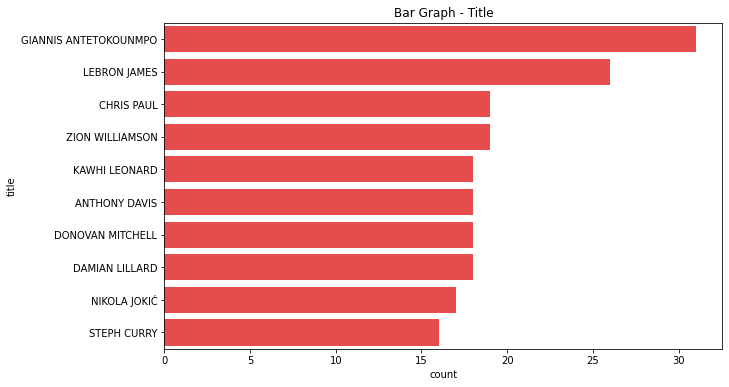

In [ ]:
plt.figure(figsize = (10, 6))
sns.countplot(y = data["title"], palette =["#FF3333"],order=data.title.value_counts().iloc[:10].index).set_title("Bar Graph - Title");
data["title"].value_counts().iloc[:10]

Count the times each unique values appear in the variable "challenge_reward" and display a bar graph of this variable.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0    1707
1     139
Name: challenge_reward, dtype: int64

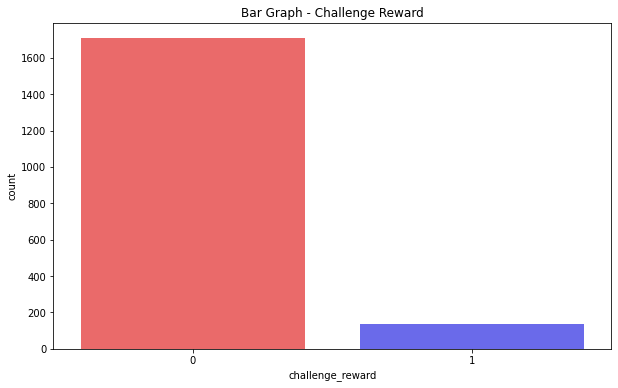

In [ ]:
plt.figure(figsize = (10, 6))
sns.countplot(data["challenge_reward"],palette="seismic_r").set_title("Bar Graph - Challenge Reward");
data["challenge_reward"].value_counts()

Count the times each unique values appear in the variable "rarity" and display a bar graph of this variable.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Common       899
Rare         645
Legendary    272
Fandom        30
Name: rarity, dtype: int64

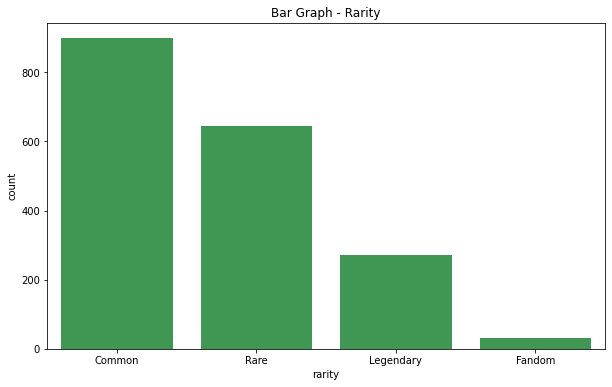

In [ ]:
plt.figure(figsize = (10, 6))
sns.countplot(data["rarity"],palette =["#31A54C"]).set_title("Bar Graph - Rarity");
data["rarity"].value_counts()

Count the times each unique values appear in the variable "scarcity" and display a bar graph of this variable.

In [ ]:
#plt.figure(figsize = (10, 6))
#sns.countplot(y=data["scarcity"], palette =["#7F00FF"], order=data.scarcity.value_counts().iloc[:10].index).set_title("Bar Graph - Scarcity");
#data["scarcity"].value_counts().iloc[:10]

299      157
499      134
12000    123
40000     99
99        77
        ... 
183        1
179        1
3169       1
7250       1
32         1
Name: scarcity, Length: 234, dtype: int64

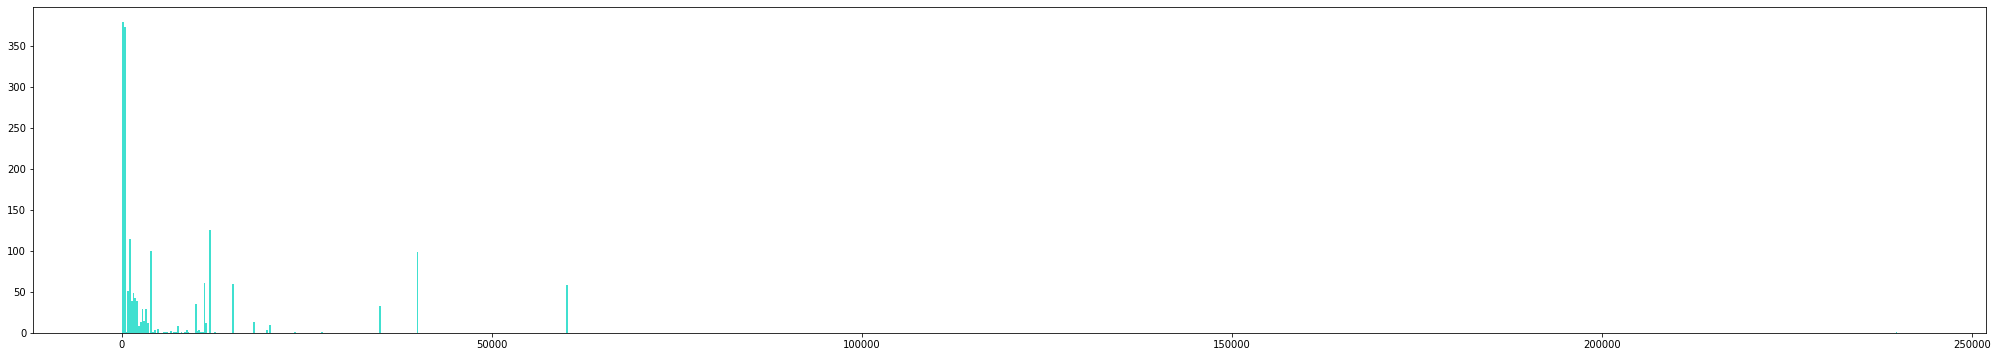

In [ ]:
plt.figure(figsize = (35, 6))
plt.hist(data['scarcity'],color = "turquoise", bins=1000)
data["scarcity"].value_counts()

Count the times each unique values appear in the variable "badge_rookie_year" and display a bar graph of this variable.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0    1664
1     182
Name: badge_rookie_year, dtype: int64

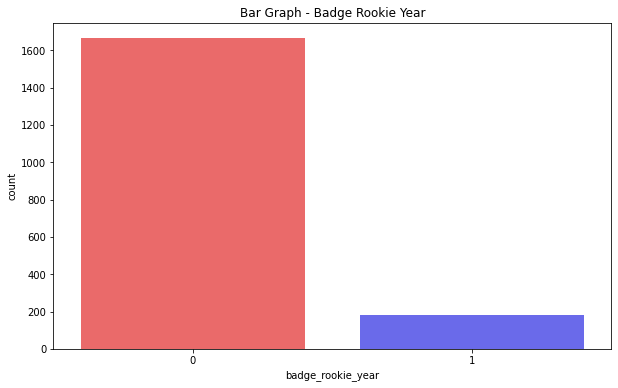

In [ ]:
plt.figure(figsize = (10, 6))
sns.countplot(data["badge_rookie_year"], palette="seismic_r").set_title("Bar Graph - Badge Rookie Year");
data["badge_rookie_year"].value_counts()

Count the times each unique values appear in the variable "badge_top_shot_debut" and display a bar graph of this variable.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0    1020
1     826
Name: badge_top_shot_debut, dtype: int64

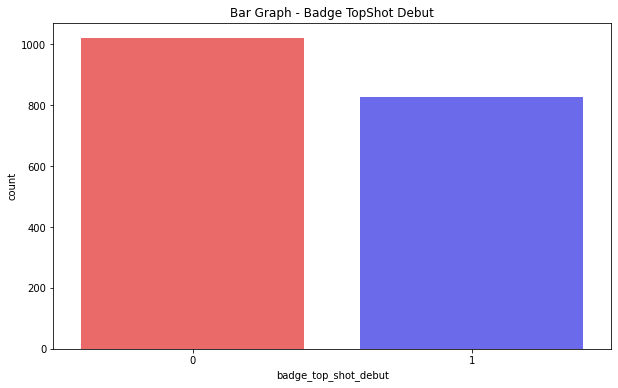

In [ ]:
plt.figure(figsize = (10, 6))
sns.countplot(data["badge_top_shot_debut"], palette="seismic_r").set_title("Bar Graph - Badge TopShot Debut");
data["badge_top_shot_debut"].value_counts()

Count the times each unique values appear in the variable "badge_rookie_mint" and display a bar graph of this variable.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0    1684
1     162
Name: badge_rookie_mint, dtype: int64

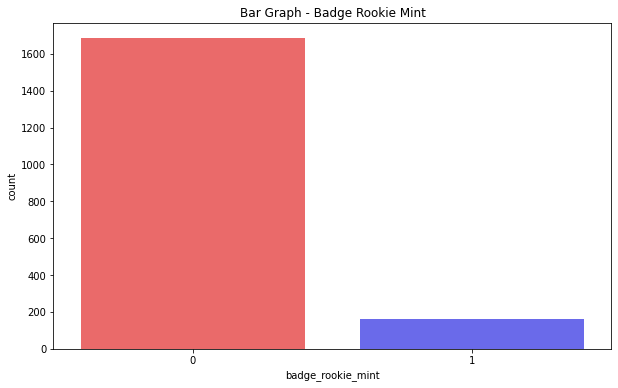

In [ ]:
plt.figure(figsize = (10, 6))
sns.countplot(data["badge_rookie_mint"],palette="seismic_r").set_title("Bar Graph - Badge Rookie Mint");
data["badge_rookie_mint"].value_counts()

Count the times each unique values appear in the variable "badge_rookie_premiere" and display a bar graph of this variable.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0    1842
1       4
Name: badge_rookie_premiere, dtype: int64

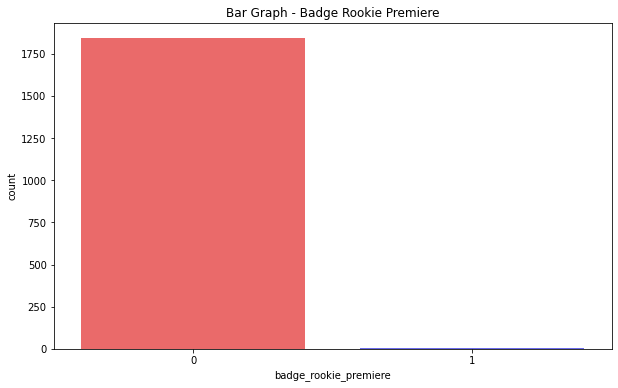

In [ ]:
plt.figure(figsize = (10, 6))
sns.countplot(data["badge_rookie_premiere"], palette="seismic_r").set_title("Bar Graph - Badge Rookie Premiere");
data["badge_rookie_premiere"].value_counts()

Count the times each unique values appear in the variable "badge_rookie_three_stars" and display a bar graph of this variable.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0    1799
1      47
Name: badge_rookie_three_stars, dtype: int64

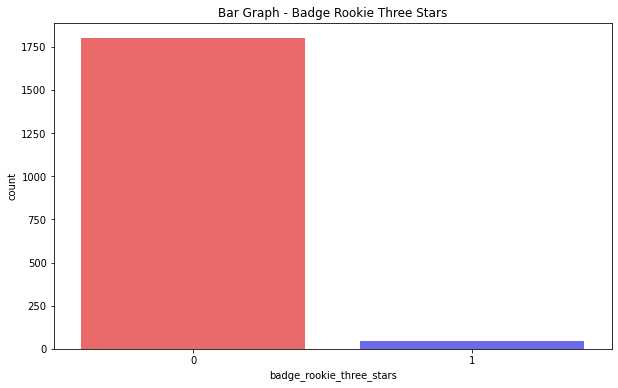

In [ ]:
plt.figure(figsize = (10, 6))
sns.countplot(data["badge_rookie_three_stars"], palette="seismic_r").set_title("Bar Graph - Badge Rookie Three Stars");
data["badge_rookie_three_stars"].value_counts()

Count the times each unique values appear in the variable "badge_championship_year" and display a bar graph of this variable.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0    1728
1     118
Name: badge_championship_year, dtype: int64

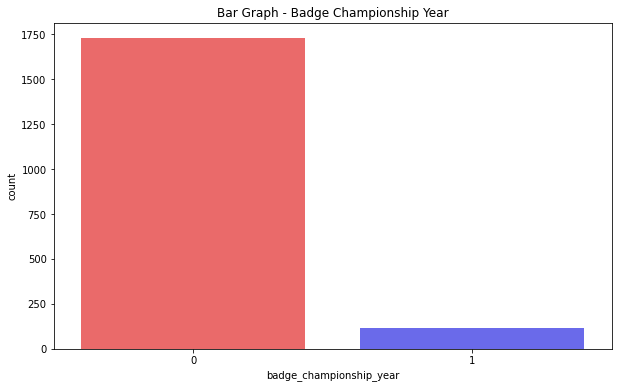

In [ ]:
plt.figure(figsize = (10, 6))
sns.countplot(data["badge_championship_year"], palette="seismic_r").set_title("Bar Graph - Badge Championship Year");
data["badge_championship_year"].value_counts()

Count the times each unique values appear in the variable "supply" and display a bar graph of this variable.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


10+    1724
8        21
9        21
4        19
7        18
5        17
6        15
3         7
2         3
1         1
Name: supply, dtype: int64

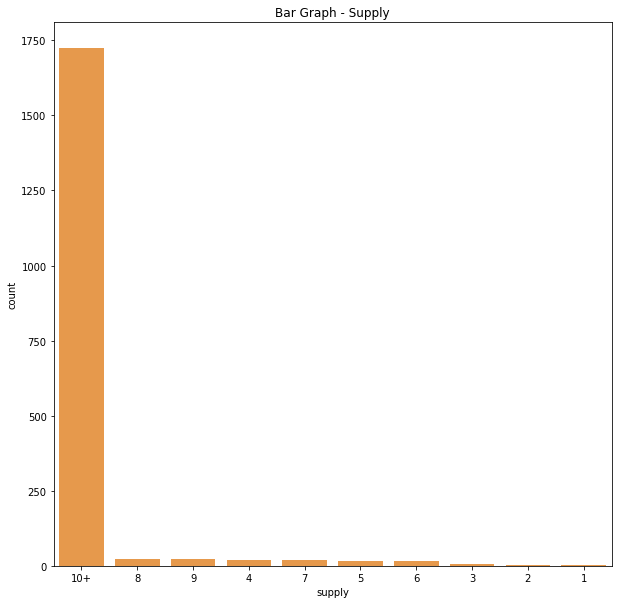

In [ ]:
plt.figure(figsize = (10, 10))
sns.countplot(data["supply"], palette=["#FF9933"],order = data.supply.value_counts().iloc[:].index).set_title("Bar Graph - Supply");
data["supply"].value_counts()

Count the times each unique values appear in the variable "Play_Type" and display a bar graph of this variable.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Dunk         693
Layup        289
3 Pointer    253
Assist       167
Block        150
Jump Shot    133
Handles       93
Steal         68
Name: Play_Type, dtype: int64

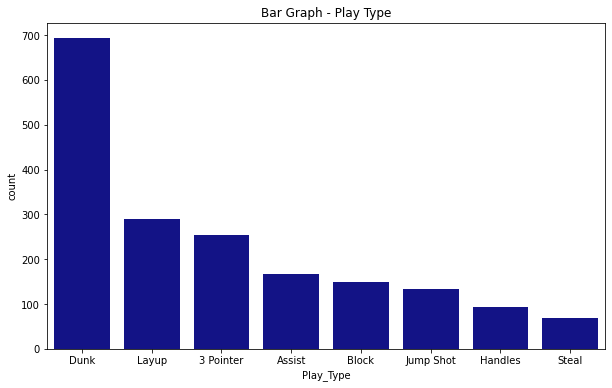

In [ ]:
plt.figure(figsize = (10, 6))
bar = sns.countplot(data["Play_Type"],palette=["#000099"],order = data.Play_Type.value_counts().iloc[:].index).set_title("Bar Graph - Play Type");
data["Play_Type"].value_counts()

Count the times each top 10 unique values appear in the variable "Set" and display a bar graph of this variable.

 Base Set                663
 Metallic Gold LE        319
 Holo Icon                85
 2021 NBA Playoffs        65
 Holo MMXX                60
 Throwdowns               58
 WNBA: Best of 2021       51
 Run It Back 2005-06      38
 Run It Back              37
 Cosmic                   30
Name: Set, dtype: int64

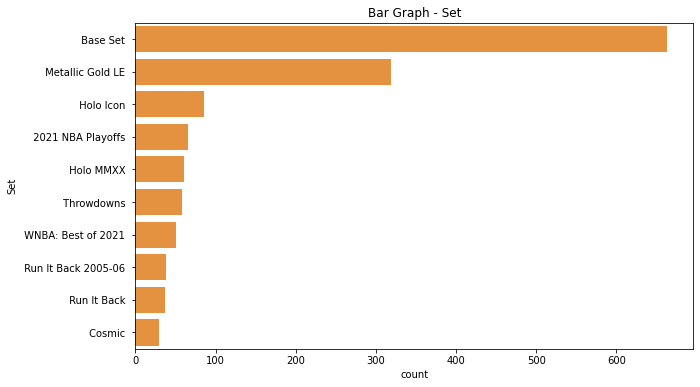

In [ ]:
plt.figure(figsize = (10, 6))
sns.countplot(y = data["Set"], palette=['#FF9224','#FF9224','#FF9224','#FF9224','#FF9224','#FF9224','#FF9224','#FF9224','#FF9224','#FF9224'],order = data.Set.value_counts().iloc[:10].index).set_title("Bar Graph - Set");
data["Set"].value_counts().iloc[:10]

Count the times each top 10 unique values appear in the variable "Set".

 Eastern Conference Finals     9
 Season Tip-off                8
 The Finals                    8
 Denied!                       8
 Metallic Silver FE            7
 MVP Moves                     7
 And Then There Were Four      6
 Vintage Vibes                 5
 The Gift                      4
 Summer of '21                 4
Name: Set, dtype: int64

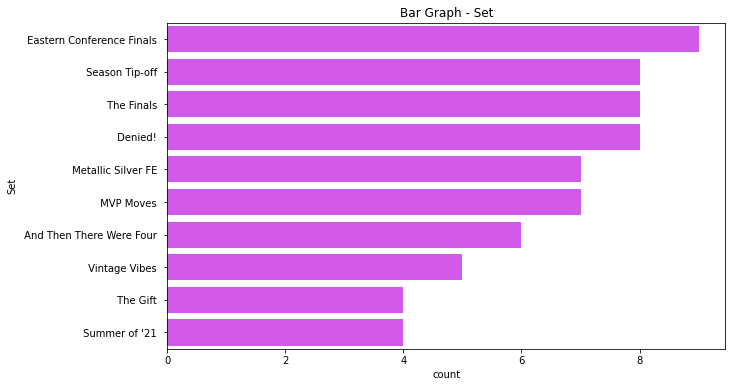

In [ ]:
plt.figure(figsize = (10, 6))
sns.countplot(y = data["Set"], palette=["#E144FF"],order = data.Set.value_counts().iloc[-10:].index).set_title("Bar Graph - Set");
data["Set"].value_counts().iloc[-10:]

Count the times each unique values appear in the variable "Series" and display a bar graph of this variable.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Series 1       793
Series 2       752
Summer 2021    160
Series 3       141
Name: Series, dtype: int64

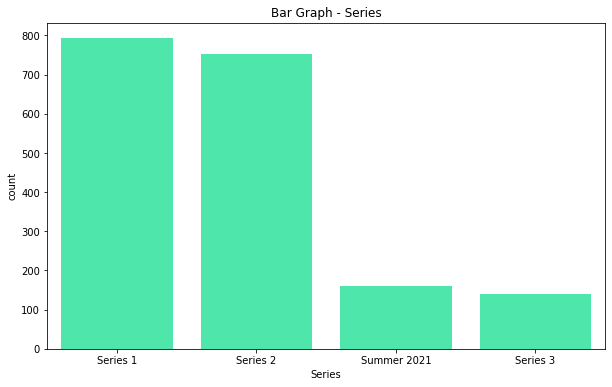

In [ ]:
plt.figure(figsize = (10, 6))
sns.countplot(data["Series"], palette=["#35FFAF"],order = data.Series.value_counts().iloc[:].index).set_title("Bar Graph - Series");
data["Series"].value_counts()

Count the times each unique values appear in the variable "Team" and display a bar graph of this variable.

 LAL    94
 MIA    91
 DEN    78
 MIL    73
 ATL    68
 WAS    67
 PHX    66
 BOS    64
 BKN    63
 DAL    61
 MEM    61
 CHI    60
 PHI    59
 HOU    58
 GSW    57
 UTA    56
 DET    55
 LAC    54
 MIN    54
 SAS    53
 POR    52
 CHA    51
 IND    51
 ORL    50
 TOR    47
 OKC    47
 SAC    46
 CLE    46
 NYK    45
 NOP    45
 PHO    10
 SEA    10
 DRT     9
 LBN     9
 LVA     9
 NYL     9
 LAS     7
 CON     7
 NJN     2
 NOH     1
 SAN     1
Name: Team, dtype: int64

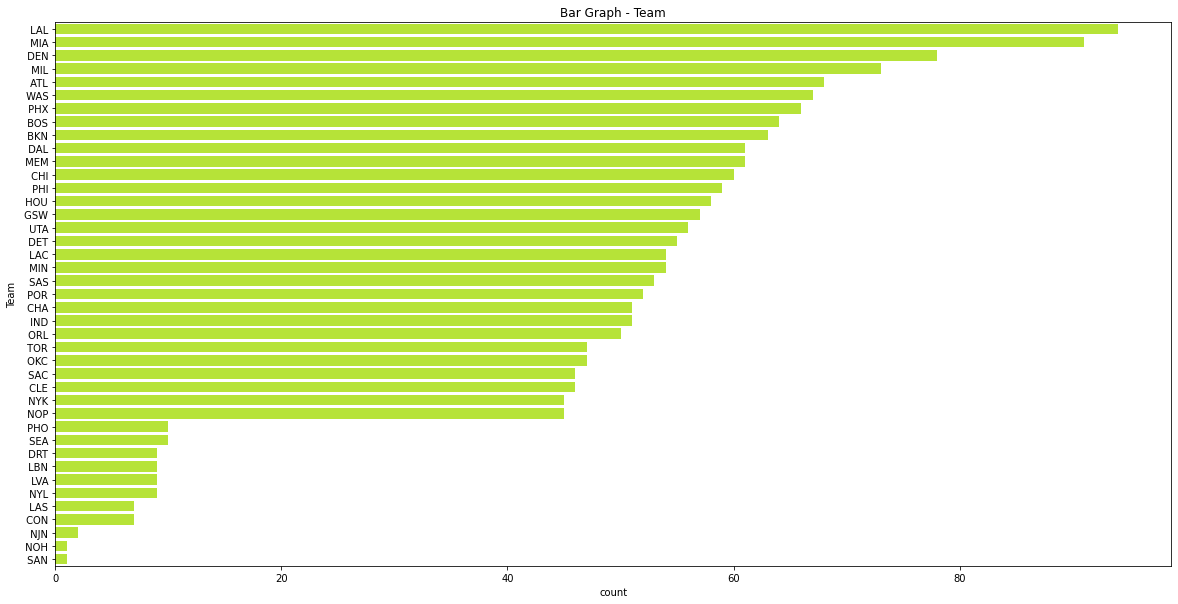

In [ ]:
plt.figure(figsize = (20, 10))
sns.countplot(y=data["Team"],palette =["#C3FF1B"],order = data.Team.value_counts().iloc[:].index).set_title("Bar Graph - Team");
data["Team"].value_counts()

Count the times each unique values appear in the variable "price" and display a histogram of this variable.

8.0          68
4.0          65
3.0          50
7.0          38
5.0          38
             ..
136.0         1
1140.0        1
2800.0        1
261.0         1
1000000.0     1
Name: price, Length: 658, dtype: int64

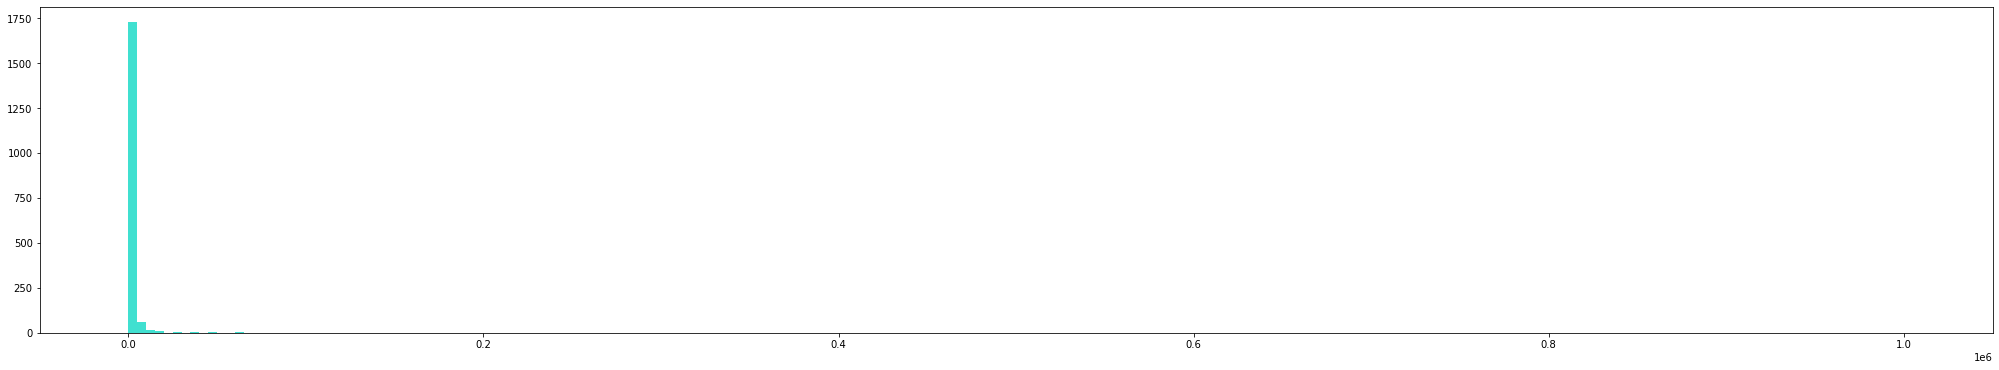

In [ ]:
plt.figure(figsize = (35, 6))
plt.hist(data['price'],color = "turquoise", bins=200)
data["price"].value_counts()

Count the times each unique values appear in the logarithmic variable "price" and display a histogram of this variable.

8.0          68
4.0          65
3.0          50
7.0          38
5.0          38
             ..
136.0         1
1140.0        1
2800.0        1
261.0         1
1000000.0     1
Name: price, Length: 658, dtype: int64

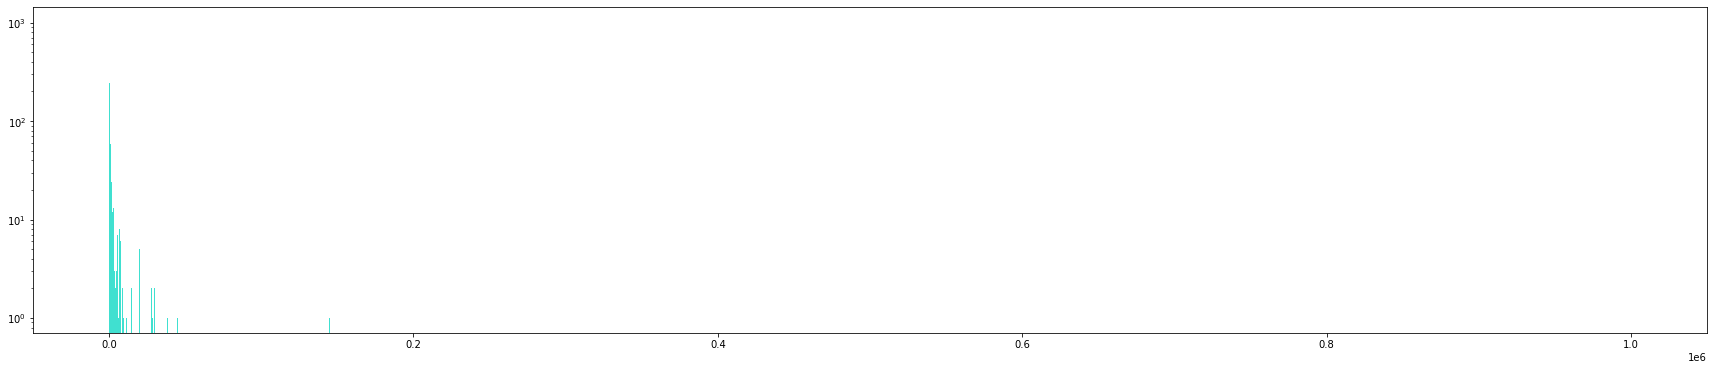

In [ ]:
plt.figure(figsize = (30, 6))
plt.hist(data['price'],color = "turquoise", bins=5000, log=True)
data["price"].value_counts()

Box plot of the variable "price".

{'boxes': [<matplotlib.lines.Line2D at 0x7fc438e9f490>],
 'caps': [<matplotlib.lines.Line2D at 0x7fc438f54d90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc438e34e50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fc438f54450>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc438f114d0>,
  <matplotlib.lines.Line2D at 0x7fc438f11190>]}

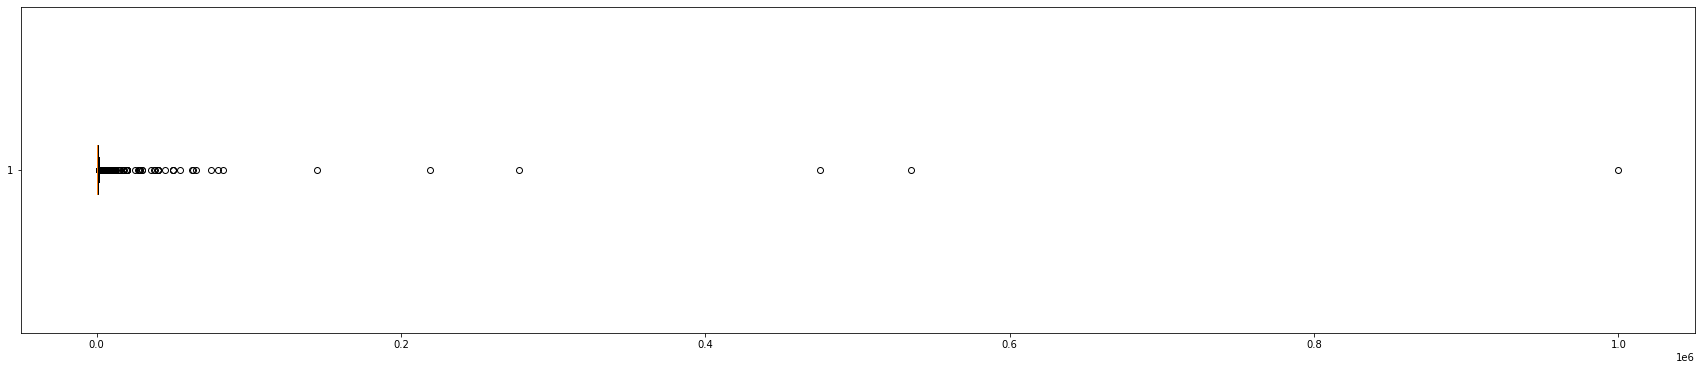

In [ ]:
plt.figure(figsize = (30, 6))
plt.boxplot(data['price'], vert=False)


Correlation matrix of the the dataset.

In [ ]:
corr = data[['title','challenge_reward','rarity','scarcity','badge_rookie_year','badge_top_shot_debut','badge_rookie_mint','badge_rookie_premiere','badge_rookie_three_stars','badge_championship_year','supply','Play_Type','Set','Series','Team', 'price']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,scarcity,price
scarcity,1.00,-0.05
price,-0.05,1.00


Density plot of the variable "price"

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


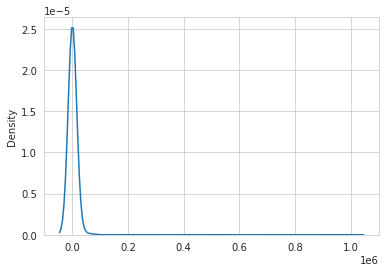

In [ ]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(data["price"]), bw=0.5)

Maximum price grouped by title.

In [ ]:
data.groupby('title')['price'].max()

title
A'JA WILSON         1245.0
AARI MCDONALD         12.0
AARON GORDON        7994.0
AARON HOLIDAY          9.0
AARON NESMITH         95.0
                    ...   
YUTA WATANABE         15.0
ZACH LAVINE        14999.0
ZEKE NNAJI            28.0
ZIAIRE WILLIAMS      110.0
ZION WILLIAMSON    64999.0
Name: price, Length: 498, dtype: float64

Minimum price grouped by title.

In [ ]:
data.groupby('title')['price'].min()

title
A'JA WILSON         10.0
AARI MCDONALD       12.0
AARON GORDON         3.0
AARON HOLIDAY        9.0
AARON NESMITH       95.0
                   ...  
YUTA WATANABE       15.0
ZACH LAVINE          7.0
ZEKE NNAJI          28.0
ZIAIRE WILLIAMS    110.0
ZION WILLIAMSON      8.0
Name: price, Length: 498, dtype: float64

Mean price grouped by title.

In [ ]:
data.groupby('title')['price'].mean()

title
A'JA WILSON         484.666667
AARI MCDONALD        12.000000
AARON GORDON       1232.636364
AARON HOLIDAY         9.000000
AARON NESMITH        95.000000
                      ...     
YUTA WATANABE        15.000000
ZACH LAVINE        2101.400000
ZEKE NNAJI           28.000000
ZIAIRE WILLIAMS     110.000000
ZION WILLIAMSON    7443.631579
Name: price, Length: 498, dtype: float64

Median price grouped by title.

In [ ]:
data.groupby('title')['price'].median()

title
A'JA WILSON         199.0
AARI MCDONALD        12.0
AARON GORDON        118.0
AARON HOLIDAY         9.0
AARON NESMITH        95.0
                    ...  
YUTA WATANABE        15.0
ZACH LAVINE         280.0
ZEKE NNAJI           28.0
ZIAIRE WILLIAMS     110.0
ZION WILLIAMSON    1429.0
Name: price, Length: 498, dtype: float64

Maximum price grouped by challenge_reward.

In [ ]:
data.groupby('challenge_reward')['price'].max()

challenge_reward
0    64999.0
1    50000.0
Name: price, dtype: float64

Minimum price grouped by challenge_reward.

In [ ]:
data.groupby('challenge_reward')['price'].min()

challenge_reward
0    2.0
1    5.0
Name: price, dtype: float64

Mean price grouped by challenge_reward.

In [ ]:
print("Average price of Non-Challenge Reward and Challenge Reward moments.")
data.groupby('challenge_reward')['price'].mean()

Average price of Non-Challenge Reward and Challenge Reward moments.


challenge_reward
0     2296.200351
1    11334.266187
Name: price, dtype: float64

Median price grouped by challenge_reward.

In [ ]:
data.groupby('challenge_reward')['price'].median()

challenge_reward
0     127.5
1    1075.0
Name: price, dtype: float64

Maximum price grouped by rarity.

In [ ]:
data.groupby('rarity')['price'].max()

rarity
Common        7927.0
Fandom        3500.0
Legendary    64999.0
Rare         19999.0
Name: price, dtype: float64

Minimum price grouped by rarity.

In [ ]:
data.groupby('rarity')['price'].min()

rarity
Common         2.0
Fandom         2.0
Legendary    777.0
Rare          67.0
Name: price, dtype: float64

Mean price grouped by rarity.

In [ ]:
print(data.groupby('rarity')['price'].mean())
sns.barplot(x= data["rarity"], y= data["price"], data=data, ci=None)

NameError: ignored

Median price grouped by rarity.

In [ ]:
data.groupby('rarity')['price'].median()

rarity
Common         20.0
Fandom         25.5
Legendary    3000.0
Rare          329.0
Name: price, dtype: float64

Maximum price grouped by scarcity.

In [ ]:
data.groupby('scarcity')['price'].max()

scarcity
25        45000.0
28         6999.0
33        19995.0
34        50000.0
36        27999.0
           ...   
27112         5.0
35000        17.0
40000        57.0
60000         8.0
239882        2.0
Name: price, Length: 233, dtype: float64

Minimum price grouped by scarcity.

In [ ]:
data.groupby('scarcity')['price'].min()

scarcity
25        20000.0
28         6999.0
33         6200.0
34        50000.0
36        27999.0
           ...   
27112         5.0
35000         4.0
40000         4.0
60000         2.0
239882        2.0
Name: price, Length: 233, dtype: float64

Mean price grouped by scarcity.

In [ ]:
data.groupby('scarcity')['price'].mean()

scarcity
25        35798.000000
28         6999.000000
33        13097.500000
34        50000.000000
36        27999.000000
              ...     
27112         5.000000
35000         5.878788
40000         6.898990
60000         3.051724
239882        2.000000
Name: price, Length: 233, dtype: float64

Median price grouped by scarcity.

In [ ]:
data.groupby('scarcity')['price'].median()

scarcity
25        37990.0
28         6999.0
33        13097.5
34        50000.0
36        27999.0
           ...   
27112         5.0
35000         5.0
40000         5.0
60000         3.0
239882        2.0
Name: price, Length: 233, dtype: float64

Maximum price grouped by badge_rookie_year.

In [ ]:
data.groupby('badge_rookie_year')['price'].max()

badge_rookie_year
0    63000.0
1    64999.0
Name: price, dtype: float64

Minimum price grouped by badge_rookie_year.

In [ ]:
data.groupby('badge_rookie_year')['price'].min()

badge_rookie_year
0    2.0
1    4.0
Name: price, dtype: float64

Mean price grouped by badge_rookie_year.

In [ ]:
print("Average price of Non-Rookie Year and Rookie Year moments.")
data.groupby('badge_rookie_year')['price'].mean()

Average price of Non-Rookie Year and Rookie Year moments.


badge_rookie_year
0    2753.180288
1    5020.796703
Name: price, dtype: float64

Median price grouped by badge_rookie_year.

In [ ]:
data.groupby('badge_rookie_year')['price'].median()

badge_rookie_year
0    134.5
1    278.5
Name: price, dtype: float64

Maximum price grouped by badge_top_shot_debut.

In [ ]:
data.groupby('badge_top_shot_debut')['price'].max()

badge_top_shot_debut
0    1000000.0
1     535000.0
Name: price, dtype: float64

Minimum price grouped by badge_top_shot_debut.

In [ ]:
data.groupby('badge_top_shot_debut')['price'].min()

badge_top_shot_debut
0    2.0
1    4.0
Name: price, dtype: float64

Mean price grouped by badge_top_shot_debut.

In [ ]:
print("Average price of Non-Top Shot Debut and Top Shot Debut moments.")
data.groupby('badge_top_shot_debut')['price'].mean()

Average price of Non-Top Shot Debut and Top Shot Debut moments.


badge_top_shot_debut
0    2212.459804
1    3920.542373
Name: price, dtype: float64

Median price grouped by badge_top_shot_debut.

In [ ]:
data.groupby('badge_top_shot_debut')['price'].median()

badge_top_shot_debut
0    110.0
1    215.0
Name: price, dtype: float64

Maximum price grouped by badge_rookie_mint.

In [ ]:
data.groupby('badge_rookie_mint')['price'].max()

badge_rookie_mint
0    63000.0
1    64999.0
Name: price, dtype: float64

Minimum price grouped by badge_rookie_mint.

In [ ]:
data.groupby('badge_rookie_mint')['price'].min()

badge_rookie_mint
0    2.0
1    4.0
Name: price, dtype: float64

Mean price grouped by badge_rookie_mint.

In [ ]:
print("Average price of Non-Rookie Mint and Rookie Mint moments.")
data.groupby('badge_rookie_mint')['price'].mean()

Average price of Non-Rookie Mint and Rookie Mint moments.


badge_rookie_mint
0    2729.188836
1    5550.141975
Name: price, dtype: float64

Median price grouped by badge_rookie_mint.

In [ ]:
data.groupby('badge_rookie_mint')['price'].median()

badge_rookie_mint
0    133.0
1    278.5
Name: price, dtype: float64

Maximum price grouped by badge_rookie_premiere.

In [ ]:
print("Maximum price of Non-Rookie Premiere and Rookie Premiere moments.")
data.groupby('badge_rookie_premiere')['price'].max()

Maximum price of Non-Rookie Premiere and Rookie Premiere moments.


badge_rookie_premiere
0    1000000.0
1       1899.0
Name: price, dtype: float64

Minimum price grouped by badge_rookie_premiere.

In [ ]:
data.groupby('badge_rookie_premiere')['price'].min()

badge_rookie_premiere
0     2.0
1    88.0
Name: price, dtype: float64

Mean price grouped by badge_rookie_premiere.

In [ ]:
print("Average price of Non-Rookie Premiere and Rookie Premiere moments.")
data.groupby('badge_rookie_premiere')['price'].mean()

Average price of Non-Rookie Premiere and Rookie Premiere moments.


badge_rookie_premiere
0    2981.965255
1     574.250000
Name: price, dtype: float64

Median price grouped by badge_rookie_premiere.


In [ ]:
data.groupby('badge_rookie_premiere')['price'].median()

badge_rookie_premiere
0    150.0
1    155.0
Name: price, dtype: float64

Maximum price grouped by badge_rookie_three_stars.

In [ ]:
data.groupby('badge_rookie_three_stars')['price'].max()

badge_rookie_three_stars
0    1000000.0
1      15555.0
Name: price, dtype: float64

Minimum price grouped by badge_rookie_three_stars.

In [ ]:
data.groupby('badge_rookie_three_stars')['price'].min()

badge_rookie_three_stars
0     2.0
1    24.0
Name: price, dtype: float64

Mean price grouped by badge_rookie_three_stars.

In [ ]:
print("Average price of Non-Rookie Three Stars and Rookie Three Stars moments.")
data.groupby('badge_rookie_three_stars')['price'].mean()

Average price of Non-Rookie Three Stars and Rookie Three Stars moments.


badge_rookie_three_stars
0    3041.051140
1     515.446809
Name: price, dtype: float64

Median price grouped by badge_rookie_three_stars.

In [ ]:
data.groupby('badge_rookie_three_stars')['price'].median()

badge_rookie_three_stars
0    154.0
1     94.0
Name: price, dtype: float64

Maximum price grouped by badge_championship_year.

In [ ]:
data.groupby('badge_championship_year')['price'].max()

badge_championship_year
0    1000000.0
1     535000.0
Name: price, dtype: float64

Minimum price grouped by badge_championship_year.

In [ ]:
data.groupby('badge_championship_year')['price'].min()

badge_championship_year
0    2.0
1    2.0
Name: price, dtype: float64

Mean price grouped by badge_championship_year.

In [ ]:
print("Average price of Non-Championship Year and Championship Year moments.")
data.groupby('badge_championship_year')['price'].mean()

Average price of Non-Championship Year and Championship Year moments.


badge_championship_year
0     2424.736111
1    11060.449153
Name: price, dtype: float64

Median price grouped by badge_championship_year.

In [ ]:
data.groupby('badge_championship_year')['price'].median()

badge_championship_year
0    139.5
1    364.5
Name: price, dtype: float64

Maximum price grouped by supply.

In [ ]:
data.groupby('supply')['price'].max()

supply
1        15500.0
10+      79500.0
2       535000.0
3      1000000.0
4       475000.0
5        64999.0
6       145000.0
7        83333.0
8        30000.0
9        63000.0
Name: price, dtype: float64

Minimum price grouped by supply.

In [ ]:
data.groupby('supply')['price'].min()

supply
1      15500.0
10+        2.0
2      19995.0
3       8888.0
4       3150.0
5       2500.0
6       4200.0
7        999.0
8       1645.0
9        933.0
Name: price, dtype: float64

Mean price grouped by supply.

supply
1       15500.000000
10+       694.280162
2      277590.666667
3      196054.714286
4       37200.263158
5       16591.764706
6       30641.133333
7       18600.388889
8        6689.666667
9        7319.571429
Name: price, dtype: float64


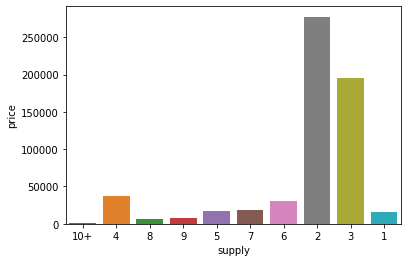

In [ ]:
print(data.groupby('supply')['price'].mean())
sns.barplot(x= data["supply"], y= data["price"], data=data, ci=None)

Median price grouped by supply.

In [ ]:
data.groupby('supply')['price'].median()

supply
1      15500.0
10+      120.0
2      19995.0
3      24995.0
4       9087.5
5       5950.0
6      10999.0
7       7200.0
8       4500.0
9       3900.0
Name: price, dtype: float64

Maximum price grouped by Play_Type.

In [ ]:
data.groupby('Play_Type')['price'].max()

Play_Type
3 Pointer    63000.0
Assist       62500.0
Block        64999.0
Dunk         50000.0
Handles      54500.0
Jump Shot    40000.0
Layup        24995.0
Steal         7777.0
Name: price, dtype: float64

Minimum price grouped by Play_Type.

In [ ]:
data.groupby('Play_Type')['price'].min()

Play_Type
3 Pointer    2.0
Assist       3.0
Block        3.0
Dunk         2.0
Handles      3.0
Jump Shot    3.0
Layup        2.0
Steal        3.0
Name: price, dtype: float64

Mean price grouped by Play_Type.

Play_Type
Layup        4208.138408
Dunk         3792.116883
Handles      3755.677419
Block        2618.406667
3 Pointer    1986.944664
Assist       1493.461078
Jump Shot     955.240602
Steal         438.191176
Name: price, dtype: float64


Text(0.5, 0, 'Price')

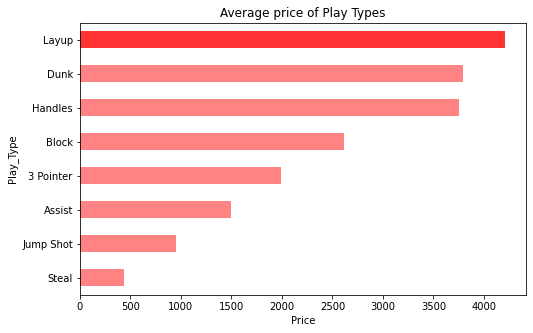

In [ ]:
plt.figure(figsize=(8,5))
avg_price_playtype = (data.groupby('Play_Type')['price'].mean().nlargest(8))
print(avg_price_playtype)
avg_price_playtype = avg_price_playtype.plot.barh(color =["#FF3333","#FF8383","#FF8383","#FF8383","#FF8383","#FF8383","#FF8383","#FF8383"])
avg_price_playtype.invert_yaxis()
avg_price_playtype.set_title("Average price of Play Types")
avg_price_playtype.set_xlabel("Price")

Median price grouped by Play_Type.

In [ ]:
data.groupby('Play_Type')['price'].median()

Play_Type
3 Pointer    141.0
Assist       172.0
Block        261.5
Dunk         151.0
Handles      255.0
Jump Shot    137.0
Layup         99.0
Steal         98.0
Name: price, dtype: float64

Maximum price grouped by Set.

In [ ]:
data.groupby('Set')['price'].max()

Set
 2020 NBA Finals                    49999.0
 2021 All-Star Game                  2599.0
 2021 NBA Finals                     9999.0
 2021 NBA Playoffs                    286.0
 And Then There Were Four            1200.0
 Archive Set                           93.0
 Base Set                            7927.0
 Conference Semifinals               3849.0
 Cool Cats                            840.0
 Cosmic                             64999.0
 Deck the Hoops                     50000.0
 Denied!                             3269.0
 Early Adopters                       300.0
 Eastern Conference Finals           1549.0
 First Round                         5099.0
 For the Win                         3900.0
 Fresh Threads                        268.0
 From the Top                       63000.0
 Got Game                             560.0
 Holo Icon                          19925.0
 Holo MMXX                          62500.0
 Hometown Showdown: Cali vs. NY       370.0
 Hustle and Show            

Minimum price grouped by Set.

In [ ]:
data.groupby('Set')['price'].min()

Set
 2020 NBA Finals                    1890.0
 2021 All-Star Game                  142.0
 2021 NBA Finals                     965.0
 2021 NBA Playoffs                     7.0
 And Then There Were Four            100.0
 Archive Set                           4.0
 Base Set                              2.0
 Conference Semifinals               365.0
 Cool Cats                             7.0
 Cosmic                             3200.0
 Deck the Hoops                     1250.0
 Denied!                             365.0
 Early Adopters                      165.0
 Eastern Conference Finals           211.0
 First Round                         315.0
 For the Win                         435.0
 Fresh Threads                         8.0
 From the Top                       4000.0
 Got Game                             65.0
 Holo Icon                           850.0
 Holo MMXX                          2199.0
 Hometown Showdown: Cali vs. NY       78.0
 Hustle and Show                       9.0
 In Her

Mean price grouped by Set.

Set
 2020 NBA Finals                     9707.700000
 2021 All-Star Game                   491.166667
 2021 NBA Finals                     2762.100000
 2021 NBA Playoffs                     34.046154
 And Then There Were Four             323.000000
 Archive Set                           13.750000
 Base Set                             104.461538
 Conference Semifinals               1082.500000
 Cool Cats                             92.400000
 Cosmic                             17814.640000
 Deck the Hoops                      7421.666667
 Denied!                             1174.875000
 Early Adopters                       220.111111
 Eastern Conference Finals            538.333333
 First Round                         1354.714286
 For the Win                         1045.700000
 Fresh Threads                         53.727273
 From the Top                       21888.700000
 Got Game                             177.458333
 Holo Icon                           2668.635294
 Holo MMXX      

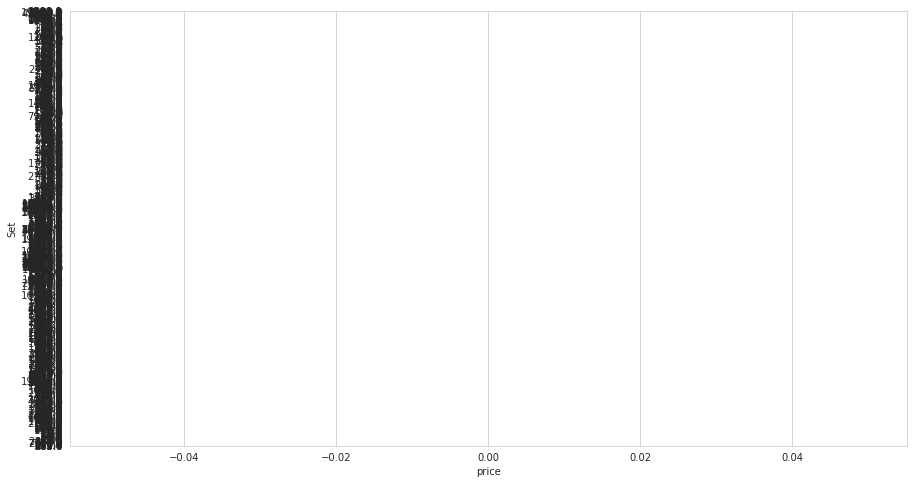

In [ ]:
plt.figure(figsize=(15,8))
print(data.groupby('Set')['price'].mean())
sns.barplot(y= data["Set"], x= data["price"], data=data, ci=None)

Median price grouped by Set.

In [ ]:
data.groupby('Set')['price'].median()

Set
 2020 NBA Finals                     3580.0
 2021 All-Star Game                   193.5
 2021 NBA Finals                     1429.5
 2021 NBA Playoffs                     11.0
 And Then There Were Four             152.5
 Archive Set                            7.0
 Base Set                              22.0
 Conference Semifinals                634.0
 Cool Cats                             23.0
 Cosmic                              8945.0
 Deck the Hoops                      3125.0
 Denied!                              644.0
 Early Adopters                       214.0
 Eastern Conference Finals            429.0
 First Round                          824.5
 For the Win                          699.5
 Fresh Threads                         15.0
 From the Top                       11625.0
 Got Game                             116.0
 Holo Icon                           1360.0
 Holo MMXX                           6332.5
 Hometown Showdown: Cali vs. NY       119.5
 Hustle and Show            

Maximum price grouped by Series.

In [ ]:
data.groupby('Series')['price'].max()

Series
Series 1       64999.0
Series 2       20000.0
Series 3       50000.0
Summer 2021     3300.0
Name: price, dtype: float64

Minimum price grouped by Series.

In [ ]:
data.groupby('Series')['price'].min()

Series
Series 1       28.0
Series 2        4.0
Series 3        2.0
Summer 2021     2.0
Name: price, dtype: float64

Mean price grouped by Series.

Series
Series 1       6218.861286
Series 2        565.550532
Series 3        708.624113
Summer 2021     239.437500
Name: price, dtype: float64


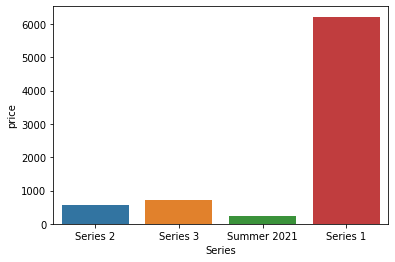

In [ ]:
print(data.groupby('Series')['price'].mean())
sns.barplot(x= data["Series"], y= data["price"], data=data, ci=None)

Median price grouped by Series.

In [ ]:
data.groupby('Series')['price'].median()

Series
Series 1       369.5
Series 2        55.0
Series 3         9.0
Summer 2021     90.0
Name: price, dtype: float64

Maximum price grouped by Team.

In [ ]:
data.groupby('Team')['price'].max()

Team
 ATL    36000.0
 BKN    19925.0
 BOS    54500.0
 CHA    11888.0
 CHI    14999.0
 CLE     6969.0
 CON     1400.0
 DAL    50000.0
 DEN    29999.0
 DET     7500.0
 DRT      250.0
 GSW    63000.0
 HOU    45000.0
 IND     6666.0
 LAC    40000.0
 LAL    49999.0
 LAS      825.0
 LBN     2599.0
 LVA     1245.0
 MEM     7777.0
 MIA    50000.0
 MIL    30000.0
 MIN    14800.0
 NJN      369.0
 NOH      310.0
 NOP    64999.0
 NYK    15555.0
 NYL     1010.0
 OKC    38349.0
 ORL     7994.0
 PHI    15500.0
 PHO     3300.0
 PHX    27000.0
 POR    28750.0
 SAC    27999.0
 SAN      175.0
 SAS     8888.0
 SEA     2093.0
 TOR    13000.0
 UTA    14870.0
 WAS    14888.0
Name: price, dtype: float64

Minimum price grouped by Team.

In [ ]:
data.groupby('Team')['price'].min()

Team
 ATL      3.0
 BKN      3.0
 BOS      3.0
 CHA      3.0
 CHI      2.0
 CLE      3.0
 CON      8.0
 DAL      3.0
 DEN      3.0
 DET      2.0
 DRT    142.0
 GSW      3.0
 HOU      3.0
 IND      2.0
 LAC      7.0
 LAL      3.0
 LAS      8.0
 LBN    152.0
 LVA      8.0
 MEM      3.0
 MIA      2.0
 MIL      3.0
 MIN      3.0
 NJN    360.0
 NOH    310.0
 NOP      4.0
 NYK      3.0
 NYL     10.0
 OKC      4.0
 ORL      3.0
 PHI      4.0
 PHO     14.0
 PHX      2.0
 POR      3.0
 SAC      3.0
 SAN    175.0
 SAS      3.0
 SEA      8.0
 TOR      3.0
 UTA      3.0
 WAS      2.0
Name: price, dtype: float64

Mean price grouped by Team.

Team
 ATL     2081.882353
 BKN     1202.047619
 BOS     1942.359375
 CHA      838.529412
 CHI      919.266667
 CLE      664.260870
 CON      222.857143
 DAL     3088.934426
 DEN     1281.589744
 DET    18885.127273
 DRT      187.666667
 GSW     4110.192982
 HOU     2058.413793
 IND      524.705882
 LAC     2147.833333
 LAL    13761.734043
 LAS      147.714286
 LBN      794.666667
 LVA      254.222222
 MEM    10961.114754
 MIA     1598.087912
 MIL     2719.876712
 MIN      986.148148
 NJN      364.500000
 NOH      310.000000
 NOP     3399.244444
 NYK     1033.866667
 NYL      235.777778
 OKC     2411.425532
 ORL      674.060000
 PHI     1110.440678
 PHO      765.000000
 PHX     1221.181818
 POR     1457.153846
 SAC     1330.652174
 SAN      175.000000
 SAS      970.584906
 SEA      271.500000
 TOR     1073.425532
 UTA      837.892857
 WAS      540.074627
Name: price, dtype: float64


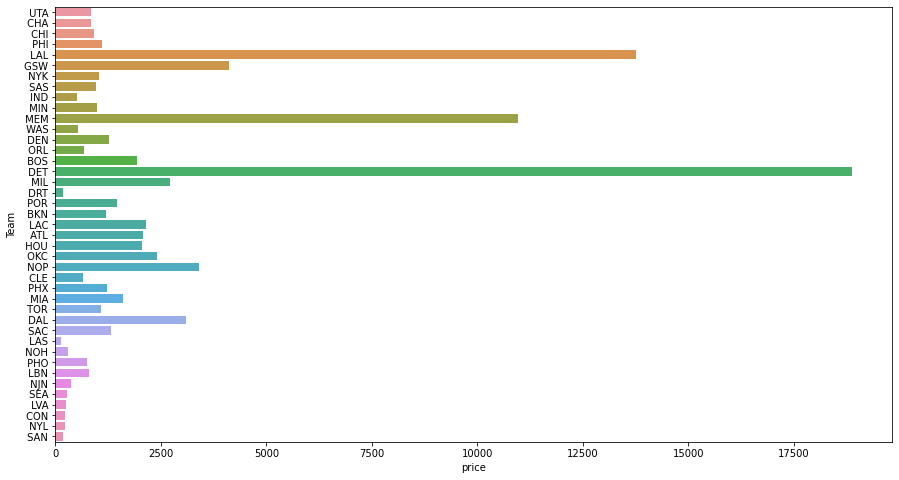

In [ ]:
plt.figure(figsize=(15,8))
print(data.groupby('Team')['price'].mean())
sns.barplot(y= data["Team"], x= data["price"], data=data, ci=None)

Team
 DET    18885.127273
 LAL    13761.734043
 MEM    10961.114754
 GSW     4110.192982
 NOP     3399.244444
 DAL     3088.934426
 MIL     2719.876712
 OKC     2411.425532
 LAC     2147.833333
 ATL     2081.882353
Name: price, dtype: float64


Text(0.5, 0, 'Price')

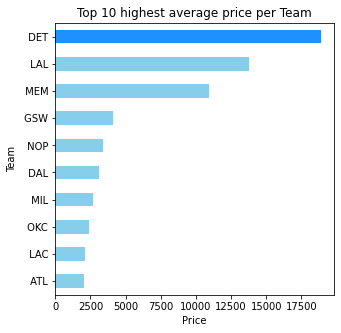

In [ ]:
top10_avg_teams = (data.groupby('Team')['price'].mean().nlargest(10))
print(top10_avg_teams)
plt.figure(figsize=(5,5))
top10_avg_team_barh = top10_avg_teams.plot.barh(color =["dodgerblue","skyblue","skyblue","skyblue","skyblue","skyblue","skyblue","skyblue","skyblue","skyblue"])
top10_avg_team_barh.invert_yaxis()
top10_avg_team_barh.set_title("Top 10 highest average price per Team")
top10_avg_team_barh.set_xlabel("Price")
# city_count  = df['City'].value_counts()
# city_count = city_count[:10,]

Median price grouped by Team.

In [ ]:
data.groupby('Team')['price'].median()

Team
 ATL     64.0
 BKN     96.0
 BOS    183.0
 CHA     81.0
 CHI    169.0
 CLE    141.0
 CON     11.0
 DAL    100.0
 DEN    211.5
 DET    128.0
 DRT    180.0
 GSW    210.0
 HOU    141.5
 IND     88.0
 LAC    140.0
 LAL    380.0
 LAS      8.0
 LBN    204.0
 LVA     10.0
 MEM    110.0
 MIA    215.0
 MIL    235.0
 MIN    150.5
 NJN    364.5
 NOH    310.0
 NOP    365.0
 NYK     94.0
 NYL     24.0
 OKC    150.0
 ORL    143.0
 PHI    150.0
 PHO    197.0
 PHX    127.5
 POR    118.5
 SAC    241.5
 SAN    175.0
 SAS    190.0
 SEA     24.0
 TOR    260.0
 UTA    142.5
 WAS     68.0
Name: price, dtype: float64

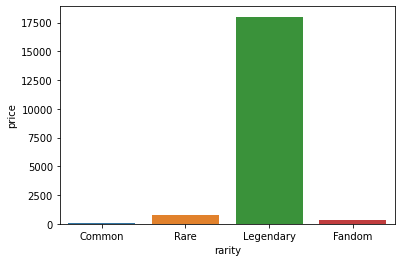

In [ ]:
ax = sns.barplot(x= data["rarity"], y= data["price"], data=data, ci=None)

# Machine Learning Analysis


In [ ]:
data_numeric = data.apply(lambda col: pd.factorize(col, sort=True)[0])
data_numeric

,title,challenge_reward,rarity,scarcity,badge_rookie_year,badge_top_shot_debut,badge_rookie_mint,badge_rookie_premiere,badge_rookie_three_stars,badge_championship_year,supply,Play_Type,Set,Series,Team,price
0,142,0,0,230,0,0,0,0,0,0,1,3,6,1,39,4
1,80,0,0,232,0,0,0,0,0,0,1,3,6,2,3,6
2,33,0,0,227,0,1,0,0,0,0,1,5,5,3,4,2
3,346,0,0,224,0,0,0,0,0,0,1,3,22,2,3,10
4,291,0,0,227,0,1,0,0,0,0,1,0,5,3,30,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1841,217,1,3,27,0,1,0,0,0,1,1,2,11,0,15,507
1842,306,0,2,14,0,0,0,0,0,1,3,3,17,0,15,653
1843,310,0,2,10,0,1,0,0,0,0,3,0,9,0,36,597
1844,329,0,2,10,0,1,0,0,0,0,4,3,9,0,11,587


In [ ]:
data

,title,challenge_reward,rarity,scarcity,badge_rookie_year,badge_top_shot_debut,badge_rookie_mint,badge_rookie_premiere,badge_rookie_three_stars,badge_championship_year,supply,Play_Type,Set,Series,Team,price
0,DONOVAN MITCHELL,0,Common,35000,0,0,0,0,0,0,10+,Dunk,Base Set,Series 2,UTA,6.0
1,CODY MARTIN,0,Common,60000,0,0,0,0,0,0,10+,Dunk,Base Set,Series 3,CHA,8.0
2,BEN GORDON,0,Common,20000,0,1,0,0,0,0,10+,Jump Shot,Archive Set,Summer 2021,CHI,4.0
3,MILES BRIDGES,0,Common,18000,0,0,0,0,0,0,10+,Dunk,Hustle and Show,Series 3,CHA,12.0
4,KYLE KORVER,0,Common,20000,0,1,0,0,0,0,10+,3 Pointer,Archive Set,Summer 2021,PHI,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1841,JAVALE MCGEE,1,Rare,150,0,1,0,0,0,1,10+,Block,Denied!,Series 1,LAL,2749.0
1842,LEBRON JAMES,0,Legendary,59,0,0,0,0,0,1,3,Dunk,From the Top,Series 1,LAL,219000.0
1843,LONNIE WALKER,0,Legendary,49,0,1,0,0,0,0,3,3 Pointer,Cosmic,Series 1,SAS,8888.0
1844,MARQUESE CHRISS,0,Legendary,49,0,1,0,0,0,0,4,Dunk,Cosmic,Series 1,GSW,7500.0


In [ ]:
# Labels are the values we want to predict
target = np.array(data['price'])
# Remove the labels from the features
# axis 1 refers to the columns
features_n = data_numeric.drop('price', axis = 1)
features = data.drop('price', axis = 1)
#One Hot Encode the features
features = pd.get_dummies(features)
# Saving feature names for later use
feature_list_n = list(features_n.columns)
feature_list = list(features.columns)
# Convert to numpy array
features_n = np.array(features_n)
features = np.array(features)

In [ ]:
features

array([[35000,     0,     0, ...,     0,     1,     0],
       [60000,     0,     0, ...,     0,     0,     0],
       [20000,     0,     0, ...,     0,     0,     0],
       ...,
       [   49,     0,     0, ...,     0,     0,     0],
       [   49,     0,     0, ...,     0,     0,     0],
       [   59,     0,     0, ...,     0,     0,     0]])

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)
x_train_n, x_test_n, y_train_n, y_test_n = train_test_split(features_n, target, test_size = 0.3, random_state = 42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1292, 625)
(554, 625)
(1292,)
(554,)


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 285, random_state = 42)
rf.fit(x_train, y_train);

In [ ]:
y_pred_rf = rf.predict(x_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_pred_rf))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred_rf))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print('R-Squared :', r2_score(y_test,y_pred_rf))

Mean Absolute Error (MAE): 2601.314185735096
Mean Squared Error (MSE): 316032819.40647924
Root Mean Squared Error (RMSE): 17777.311928592557
R-Squared : -0.5892459802027816


Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state = 42)
dt.fit(x_train, y_train);

In [ ]:
y_pred_dt = dt.predict(x_test)

In [ ]:
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_pred_dt))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred_dt))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print('R-Squared :', r2_score(y_test,y_pred_dt))

Mean Absolute Error (MAE): 2781.430204572804
Mean Absolute Percentage Error (MAPE): 0.5794166360180872
Mean Squared Error (MSE): 663198153.4001203
Root Mean Squared Error (RMSE): 25752.633911895697
R-Squared : -2.3350491931454136


Multiple Linear Regression


In [ ]:
from sklearn import linear_model
lin_regr = linear_model.LinearRegression()
lin_regr.fit(x_train, y_train);

In [ ]:
y_pred_lr = lin_regr.predict(x_test)

In [ ]:
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_pred_lr))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred_lr))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print('R-Squared :', r2_score(y_test, y_pred_lr))

Mean Absolute Error (MAE): 17187669336.72488
Mean Absolute Percentage Error (MAPE): 904639712.7413
Mean Squared Error (MSE): 1.7879103578396288e+22
Root Mean Squared Error (RMSE): 133712765203.61206
R-Squared : -89909312409256.08


ADA BOOST

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ADAregr = AdaBoostRegressor(random_state=42, n_estimators=100)
ADAregr.fit(x_train, y_train);

In [ ]:
y_pred_ADAregr = ADAregr.predict(x_test)

In [ ]:
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_pred_ADAregr))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred_ADAregr))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_pred_ADAregr)))
print('R-Squared :', r2_score(y_test, y_pred_ADAregr))

Mean Absolute Error (MAE): 11462.486360918676
Mean Absolute Percentage Error (MAPE): 462.3411343210982
Mean Squared Error (MSE): 766771670.6667014
Root Mean Squared Error (RMSE): 27690.64229422462
R-Squared : -2.855893187387876


Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gr_reghuber = GradientBoostingRegressor(loss='huber', n_estimators= 61, random_state=42)
gr_reghuber.fit(x_train, y_train);

In [ ]:
y_pred_grreg = gr_reghuber.predict(x_test)

In [ ]:
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_pred_grreg))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred_grreg))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_pred_grreg)))
print('R-Squared :', r2_score(y_test, y_pred_grreg))

Mean Absolute Error (MAE): 1394.2697778127197
Mean Squared Error (MSE): 162275503.62965304
Root Mean Squared Error (RMSE): 12738.740268552972
R-Squared : 0.18395914603696806


Support Vector Regression

In [ ]:
from sklearn.svm import SVR
svregr = SVR(C=10)
svregr.fit(x_train, y_train);

In [ ]:
y_pred_svregr = svregr.predict(x_test)

In [ ]:
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_pred_svregr))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred_svregr))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_pred_svregr)))
print('R-Squared :', r2_score(y_test, y_pred_svregr))

Mean Absolute Error (MAE): 2145.432270787162
Mean Absolute Percentage Error (MAPE): 1.1137223908022305
Mean Squared Error (MSE): 202504850.8730891
Root Mean Squared Error (RMSE): 14230.419912043675
R-Squared : -0.018343667047076462


Nu Support Vector Regression

In [ ]:
from sklearn.svm import NuSVR
nusvregr = NuSVR(nu = 0.9, C=5)
nusvregr.fit(x_train, y_train);

In [ ]:
y_pred_nusvregr = nusvregr.predict(x_test)

In [ ]:
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_pred_nusvregr))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred_nusvregr))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_pred_nusvregr)))
print('R-Squared :', r2_score(y_test, y_pred_nusvregr))

Mean Absolute Error (MAE): 2151.0253205869726
Mean Absolute Percentage Error (MAPE): 1.2590914970107996
Mean Squared Error (MSE): 202650748.88688836
Root Mean Squared Error (RMSE): 14235.545261312907
R-Squared : -0.019077349809472954


Linear SVR

In [ ]:
from sklearn.svm import LinearSVR
linsvregr = LinearSVR(epsilon=3)
linsvregr.fit(x_train, y_train);

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
y_pred_linsvregr = linsvregr.predict(x_test)

In [ ]:
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_pred_linsvregr))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred_linsvregr))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_pred_linsvregr)))
print('R-Squared :', r2_score(y_test, y_pred_linsvregr))

Mean Absolute Error (MAE): 2228.002153787796
Mean Absolute Percentage Error (MAPE): 14.224150447637856
Mean Squared Error (MSE): 200628639.9611448
Root Mean Squared Error (RMSE): 14164.343965081645
R-Squared : -0.008908695529181943


Bagging

In [ ]:
from sklearn.ensemble import BaggingRegressor
baggregr = BaggingRegressor(n_estimators=80, random_state=42)
baggregr.fit(x_train, y_train);

In [ ]:
y_pred_bag = baggregr.predict(x_test)

In [ ]:
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_pred_bag))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred_bag))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_pred_bag)))
print('R-Squared :', r2_score(y_test, y_pred_bag))

Mean Absolute Error (MAE): 3106.047821578993
Mean Absolute Percentage Error (MAPE): 0.796463452053314
Mean Squared Error (MSE): 394755821.90120214
Root Mean Squared Error (RMSE): 19868.462997957395
R-Squared : -0.9851232675655095


SGD Regressor

In [ ]:
from sklearn.linear_model import SGDRegressor
sgdreg = SGDRegressor(loss='squared_error', penalty = "elasticnet")
sgdreg.fit(x_train, y_train);

In [ ]:
y_pred_sgd = sgdreg.predict(x_test)

In [ ]:
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_pred_sgd))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred_sgd))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_pred_sgd)))
print('R-Squared :', r2_score(y_test, y_pred_sgd))

Mean Absolute Error (MAE): 2.2558463176458003e+17
Mean Absolute Percentage Error (MAPE): 4.222761773641733e+16
Mean Squared Error (MSE): 2.0824832441702288e+35
Root Mean Squared Error (RMSE): 4.5634233248409344e+17
R-Squared : -1.0472260858390238e+27


Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=415)
ridge.fit(x_train,y_train);

In [ ]:
y_pred_ridge = ridge.predict(x_test)

In [ ]:
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_pred_ridge))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred_ridge))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print('R-Squared :', r2_score(y_test, y_pred_ridge))

Mean Absolute Error (MAE): 4426.784321790995
Mean Squared Error (MSE): 184278112.7859775
Root Mean Squared Error (RMSE): 13574.907468781417
R-Squared : 0.0733138079314768


Lasso Regression

In [ ]:
from sklearn import linear_model
lassoregr = linear_model.Lasso(alpha=5)
lassoregr.fit(x_train,y_train);

In [ ]:
y_pred_lasso = lassoregr.predict(x_test)

In [ ]:
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_pred_lasso))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred_lasso))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print('R-Squared :', r2_score(y_test, y_pred_lasso))

Mean Absolute Error (MAE): 4887.462917241605
Mean Squared Error (MSE): 186306780.11491886
Root Mean Squared Error (RMSE): 13649.424167887773
R-Squared : 0.06311217316536732


Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet
enregr = ElasticNet(random_state = 42)
enregr.fit(x_train,y_train);

In [ ]:
y_pred_elasticnet = enregr.predict(x_test)

In [ ]:
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_pred_elasticnet))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred_elasticnet))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_pred_elasticnet)))
print('R-Squared :', r2_score(y_test, y_pred_elasticnet))

Mean Absolute Error (MAE): 4435.695738130889
Mean Squared Error (MSE): 184224570.55587333
Root Mean Squared Error (RMSE): 13572.935222562337
R-Squared : 0.07358305773320295


K-Neighbors Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=30)
neigh.fit(x_train,y_train);

In [ ]:
y_pred_neigh = neigh.predict(x_test)

In [ ]:
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_pred_neigh))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred_neigh))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_pred_neigh)))
print('R-Squared :', r2_score(y_test, y_pred_neigh))

Mean Absolute Error (MAE): 2066.626113116727
Mean Absolute Percentage Error (MAPE): 0.976888569266215
Mean Squared Error (MSE): 175146975.09222627
Root Mean Squared Error (RMSE): 13234.310525759409
R-Squared : 0.11923189929213229


Gaussian Process Regressor

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
gpr = GaussianProcessRegressor(random_state=42)
gpr.fit(x_train, y_train)

GaussianProcessRegressor(random_state=42)

In [ ]:
y_pred_gpr = gpr.predict(x_test)

In [ ]:
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_pred_gpr))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred_gpr))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_pred_gpr)))
print('R-Squared :', r2_score(y_test, y_pred_gpr))

Mean Absolute Error (MAE): 2055.4159168065307
Mean Absolute Percentage Error (MAPE): 0.6399965985239279
Mean Squared Error (MSE): 220929062.0718014
Root Mean Squared Error (RMSE): 14863.682655109445
R-Squared : -0.1109941823984586


PLS Regression

In [ ]:
from sklearn.cross_decomposition import PLSRegression
pls = PLSRegression(n_components=3)
pls.fit(x_train, y_train);

In [ ]:
y_pred_pls = pls.predict(x_test)

In [ ]:
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_pred_pls))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred_pls))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_pred_pls)))
print('R-Squared :', r2_score(y_test, y_pred_pls))

Mean Absolute Error (MAE): 9323.071912831223
Mean Absolute Percentage Error (MAPE): 201.65471609669115
Mean Squared Error (MSE): 1009578583.9386599
Root Mean Squared Error (RMSE): 31773.866367482882
R-Squared : -4.076905332922639


Multi-layer Perceptron Regressor

In [ ]:
from sklearn.neural_network import MLPRegressor
mlp_regr = MLPRegressor(random_state=42, max_iter=10000)
mlp_regr.fit(x_train, y_train);

In [ ]:
y_pred_mlpregr = mlp_regr.predict(x_test)

In [ ]:
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_pred_mlpregr))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred_mlpregr))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_pred_mlpregr)))
print('R-Squared :', r2_score(y_test, y_pred_mlpregr))

Mean Absolute Error (MAE): 3888.3727141561612
Mean Squared Error (MSE): 210224052.19526458
Root Mean Squared Error (RMSE): 14499.105220504629
R-Squared : -0.05716150151971955


Recurrent Neural Networks

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from keras.layers import Dense, Activation, Flatten

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(625, kernel_initializer='normal',input_dim = x_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 625)               391250    
                                                                 
 dense_1 (Dense)             (None, 256)               160256    
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 617,555
Trainable params: 617,555
Non-trainable params: 0
_________________________________________________________________


In [ ]:
NN_model.fit(x_train, y_train, epochs=500, batch_size=32)

Epoch 1/500
41/41 [==============================] - 1s 12ms/step - loss: 10637065.0000 - mean_squared_error: 10637065.0000
Epoch 2/500
41/41 [==============================] - 0s 11ms/step - loss: 12024684.0000 - mean_squared_error: 12024684.0000
Epoch 3/500
41/41 [==============================] - 1s 12ms/step - loss: 9885038.0000 - mean_squared_error: 9885038.0000
Epoch 4/500
41/41 [==============================] - 0s 11ms/step - loss: 10881874.0000 - mean_squared_error: 10881874.0000
Epoch 5/500
41/41 [==============================] - 1s 13ms/step - loss: 13688734.0000 - mean_squared_error: 13688734.0000
Epoch 6/500
41/41 [==============================] - 0s 10ms/step - loss: 10462796.0000 - mean_squared_error: 10462796.0000
Epoch 7/500
41/41 [==============================] - 1s 13ms/step - loss: 7456500.0000 - mean_squared_error: 7456500.0000
Epoch 8/500
41/41 [==============================] - 0s 12ms/step - loss: 7031250.0000 - mean_squared_error: 7031250.0000
Epoch 9/500
41

In [ ]:
y_pred_NN = NN_model.predict(x_test)

In [ ]:
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_pred_NN))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred_NN))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_pred_NN)))
print('R-Squared :', r2_score(y_test, y_pred_NN))

Mean Absolute Error (MAE): 4772.386517792403
Mean Absolute Percentage Error (MAPE): 1.1817244267077178
Mean Squared Error (MSE): 1272552158.6954892
Root Mean Squared Error (RMSE): 35672.849040909095
R-Squared : -5.399330318298314


Voting Regressor

In [ ]:
from sklearn.ensemble import VotingRegressor
ereg = VotingRegressor(estimators=[('Gradient Boosting Regressor (Huber)', gr_reghuber), ('Ridge Regressor', ridge), ('Elastic Net Regressor', enregr), ("MLP Regressor",mlp_regr)])
ereg = ereg.fit(x_train, y_train);

In [ ]:
y_pred_ereg = ereg.predict(x_test)

In [ ]:
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_pred_ereg))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred_ereg))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_pred_ereg)))
print('R-Squared :', r2_score(y_test, y_pred_ereg))

Mean Absolute Error (MAE): 3160.3453658149015
Mean Squared Error (MSE): 161845394.82179323
Root Mean Squared Error (RMSE): 12721.84714661331
R-Squared : 0.18612205017845795


Most Important Variables

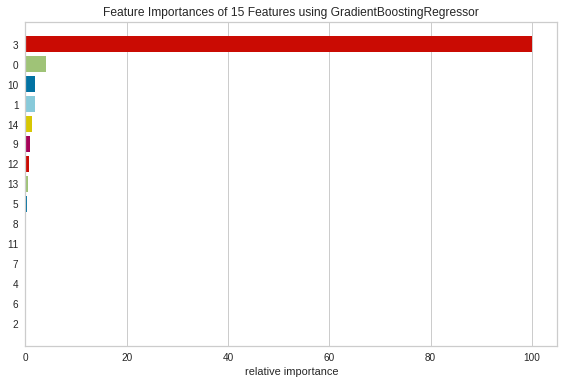

In [ ]:
from yellowbrick.model_selection import FeatureImportances
gr_reghuber.fit(x_train_n, y_train_n);
viz = FeatureImportances(gr_reghuber)
viz.fit(x_train, y_train)
viz.show()

In [ ]:
gr_reghuber.feature_importances_

array([3.57369073e-02, 1.62922848e-02, 0.00000000e+00, 8.91902066e-01,
       2.82701215e-04, 2.05040680e-03, 1.29898937e-06, 6.80353088e-04,
       1.37246408e-03, 8.82020905e-03, 1.73710163e-02, 1.30624016e-03,
       6.95116307e-03, 4.89313301e-03, 1.23397560e-02])

<BarContainer object of 15 artists>

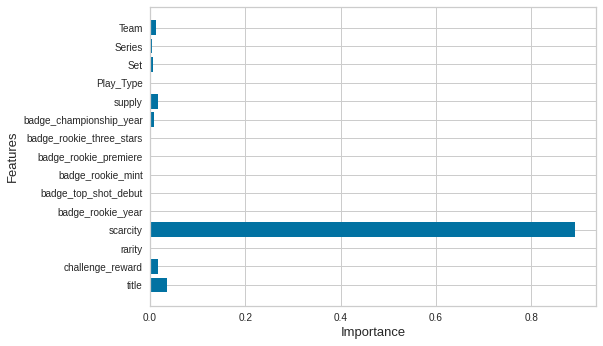

In [ ]:
plt.ylabel("Features", fontsize=13)
plt.xlabel("Importance", fontsize=13)
plt.barh(feature_list_n, gr_reghuber.feature_importances_)